# Denmark Office

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [112]:
df_1h = pd.read_csv('D:/payday/train_public/1h/L03.B02_1H.csv')
df_weather = pd.read_csv('D:/payday/train_public/weather/L03_weather_train.csv')

In [113]:
df_1h.describe()

main_meter(kW)
count     8282.000000
mean        76.356201
std         39.759828
min          0.294118
25%         47.286330
50%         70.556538
75%         98.714081
max        284.500000

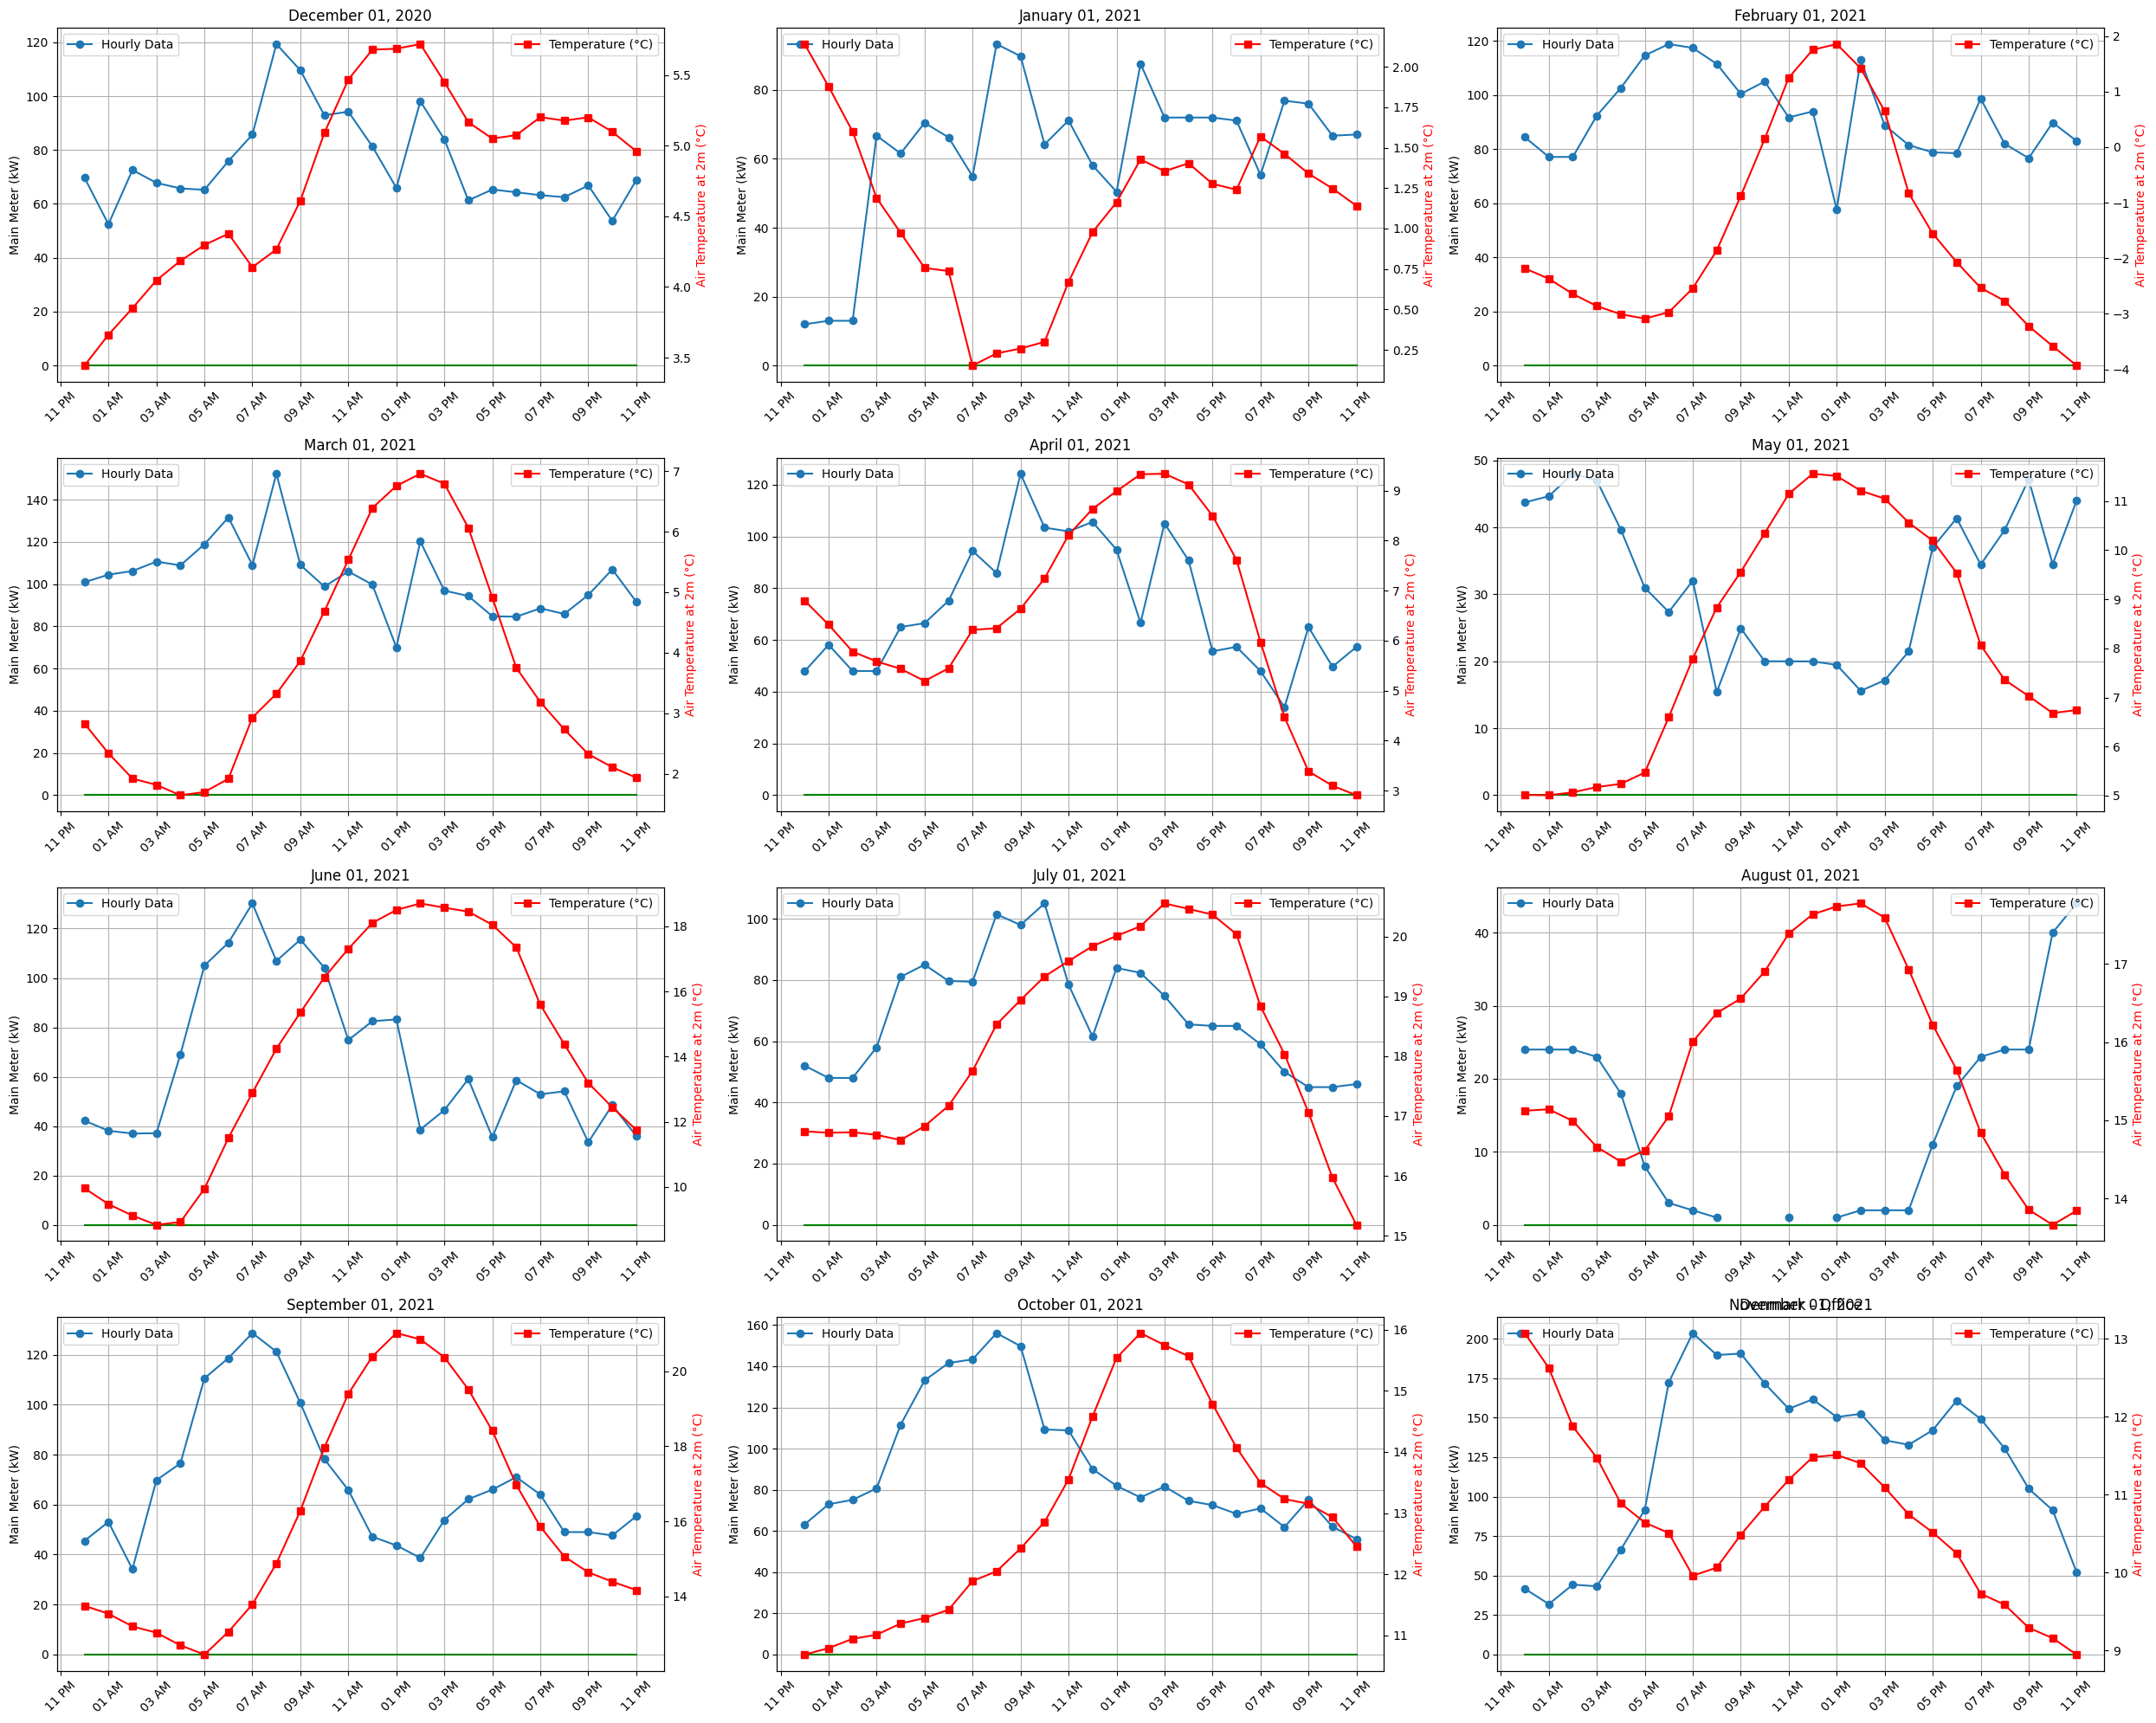

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_1h, df_bo1min15, and df_weather are your DataFrames and already loaded

# Convert the 'timestamp' column to datetime for all DataFrames
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])

df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Create a list of dates for the first day of each month in 2021
dates = pd.date_range(start='2020-12-01', end='2021-11-01', freq='MS').date

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each date and create the plot
for i, date in enumerate(dates):
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_weather = df_weather[df_weather['timestamp'].dt.date == pd.to_datetime(date).date()]

    # Plot hourly data
    axes[i].plot(one_day_hourly['timestamp'],[0]*len(one_day_hourly['main_meter(kW)']),color = 'green')
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', label='Hourly Data')
    
    axes[i].set_ylabel('Main Meter (kW)')
    axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Plot weather data
    ax2 = axes[i].twinx()
    ax2.plot(one_day_weather['timestamp'], one_day_weather['air_temperature_at_2m(deg_C)'], marker='s', color='red', label='Temperature (°C)')
    ax2.set_ylabel('Air Temperature at 2m (°C)', color='red')
    ax2.legend(loc='upper right')

    # Limit x-ticks to avoid max ticks error
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set interval to 2 hours
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for the last subplot
for ax in axes:

    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.title('Denmark - Office')
plt.show()

If the location is an office/School/Kindergarten, these usually remain close on Sundays, so for these dates, the consuption should be fairly low, and the normal day curve of low in mornings and evenings is visible with the contrast of sunny afternoons. Nordic countries usually have a weather on the lower side, which can be poised to induce the need for the heating service, thus having the main meter reading go up.

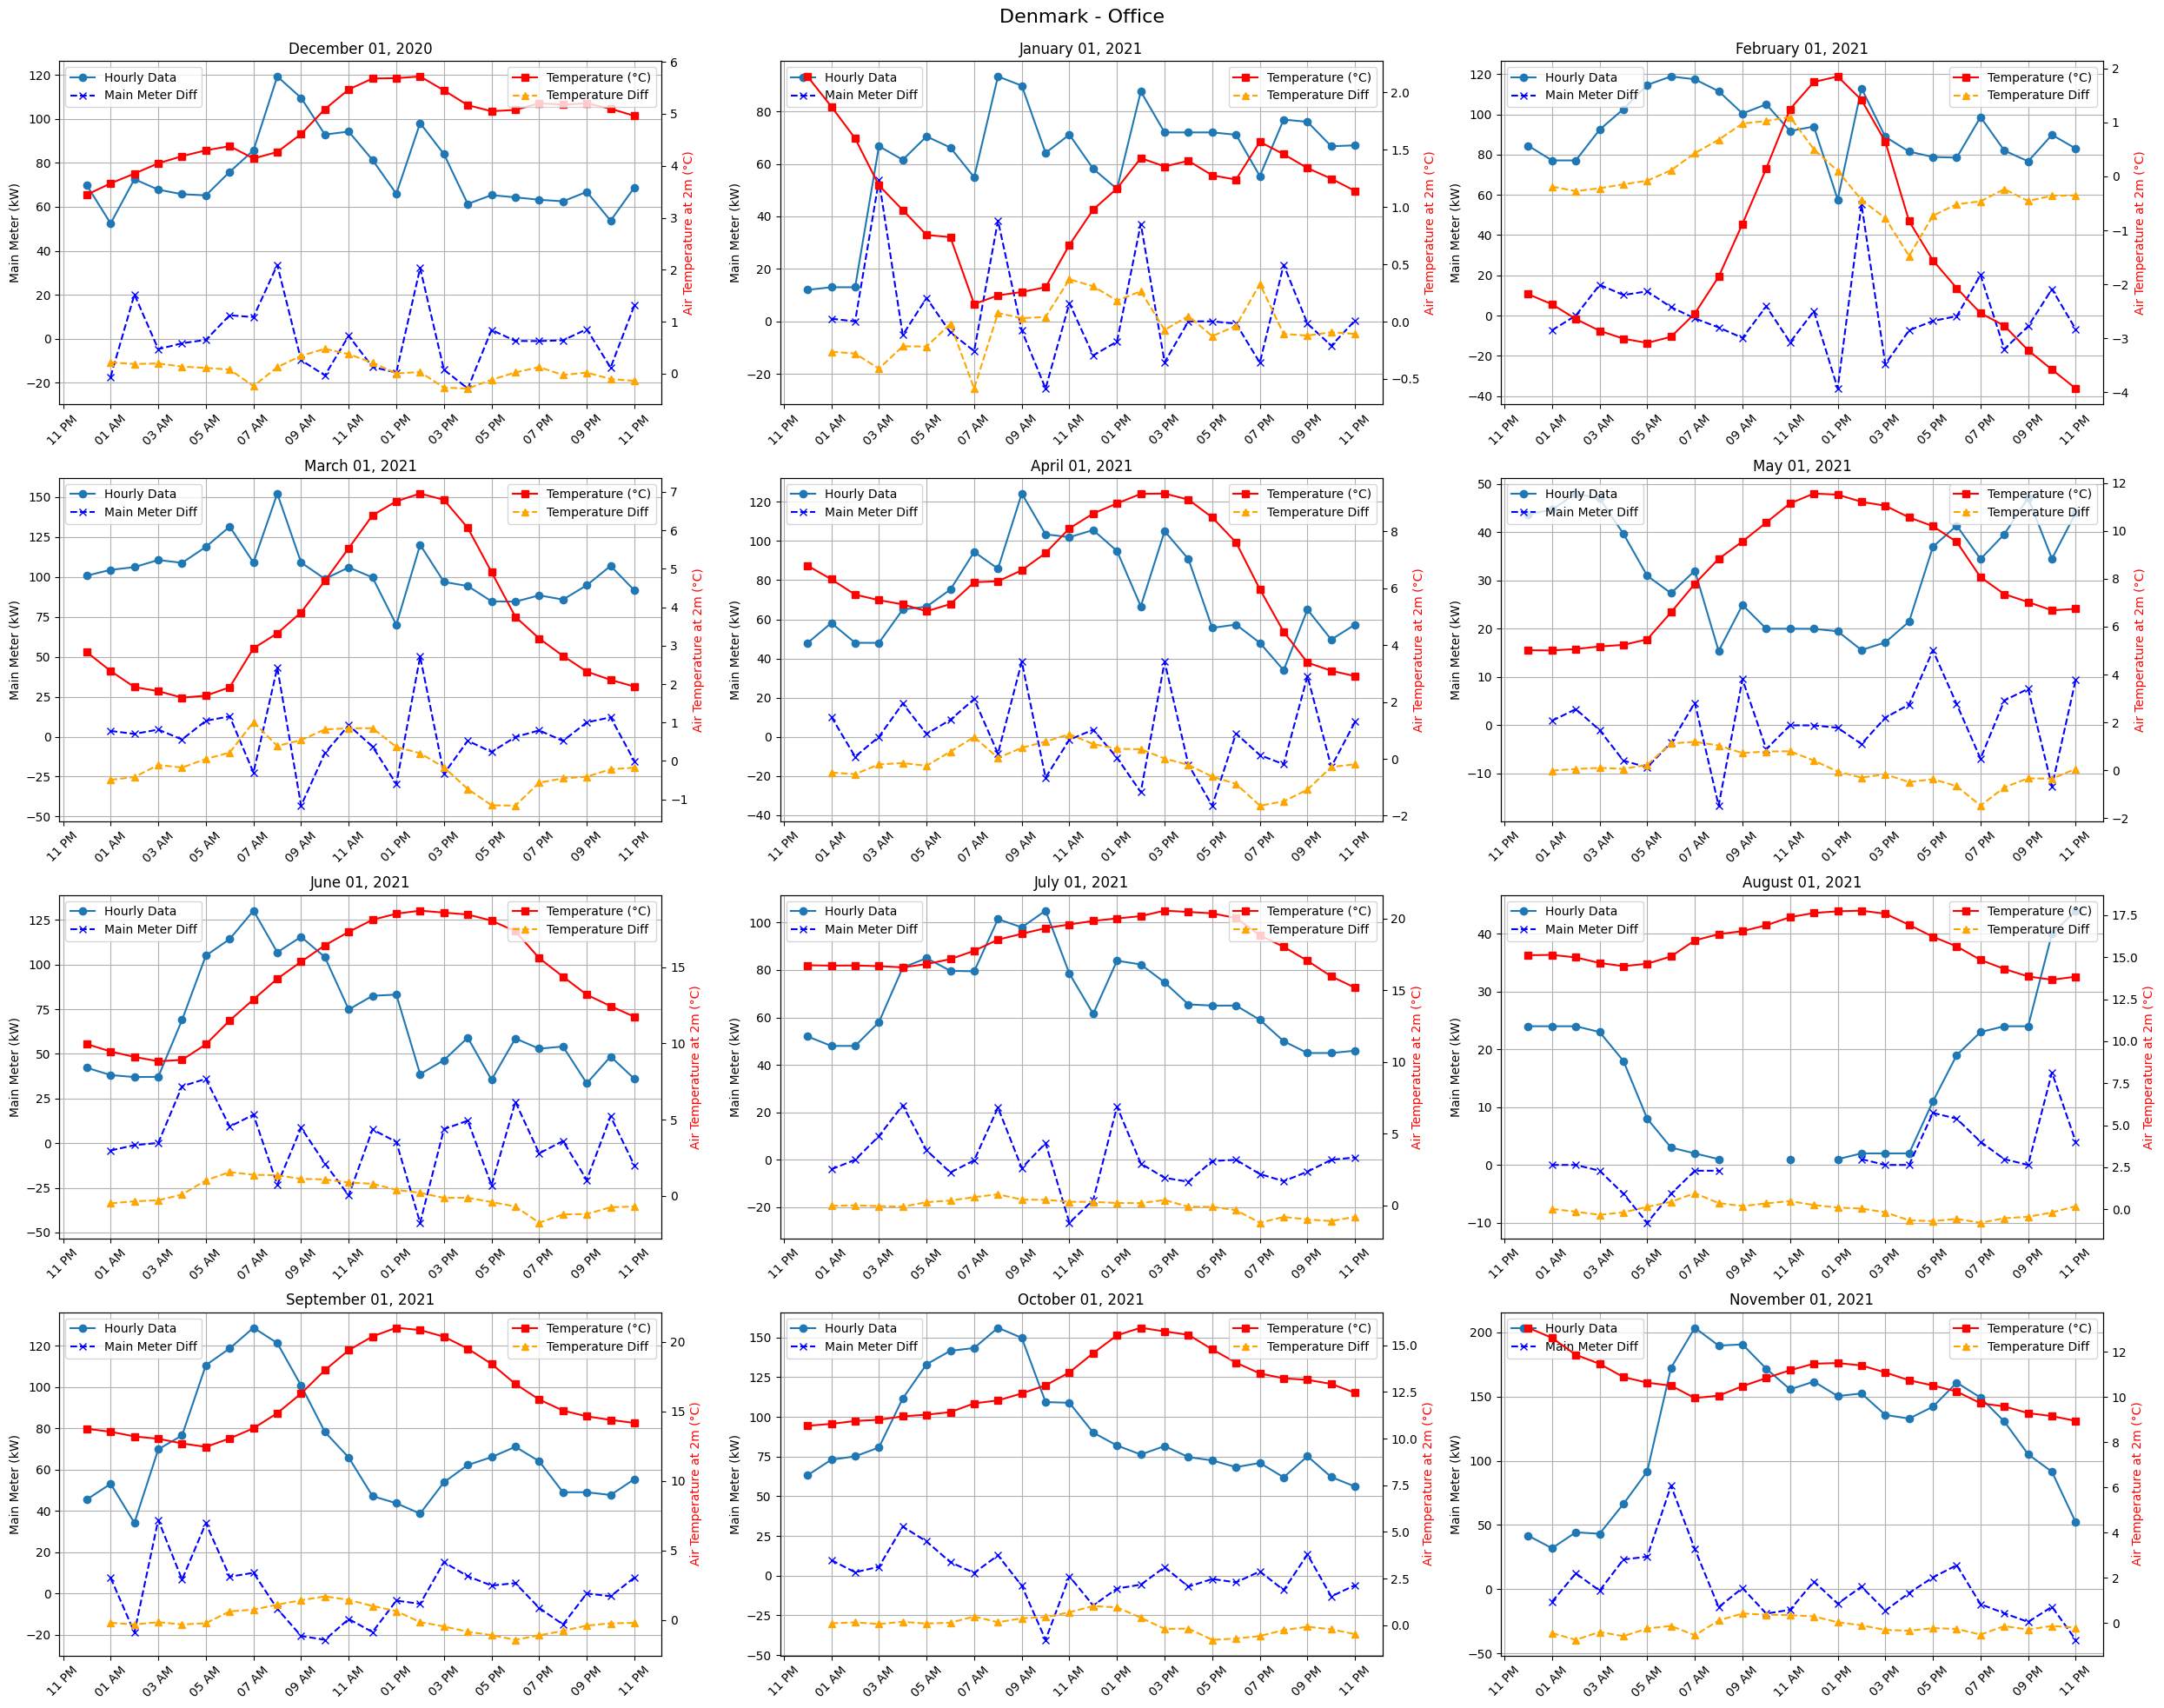

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_1h and df_weather are your DataFrames and already loaded

# Convert the 'timestamp' column to datetime for all DataFrames
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Create a list of dates for the first day of each month in 2021
dates = pd.date_range(start='2020-12-01', end='2021-11-01', freq='MS').date

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each date and create the plot
for i, date in enumerate(dates):
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_weather = df_weather[df_weather['timestamp'].dt.date == pd.to_datetime(date).date()]

    # Calculate the derivative for main_meter(kW) data
    main_meter_diff = one_day_hourly['main_meter(kW)'].diff() / (one_day_hourly['timestamp'].diff().dt.total_seconds() / 3600)

    # Plot hourly data
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', label='Hourly Data')
    axes[i].plot(one_day_hourly['timestamp'], main_meter_diff, marker='x', linestyle='--', color='blue', label='Main Meter Diff')

    axes[i].set_ylabel('Main Meter (kW)')
    axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Plot weather data
    ax2 = axes[i].twinx()
    air_temp_diff = one_day_weather['air_temperature_at_2m(deg_C)'].diff() / (one_day_weather['timestamp'].diff().dt.total_seconds() / 3600)
    ax2.plot(one_day_weather['timestamp'], one_day_weather['air_temperature_at_2m(deg_C)'], marker='s', color='red', label='Temperature (°C)')
    ax2.plot(one_day_weather['timestamp'], air_temp_diff, marker='^', linestyle='--', color='orange', label='Temperature Diff')
    ax2.set_ylabel('Air Temperature at 2m (°C)', color='red')
    ax2.legend(loc='upper right')

    # Limit x-ticks to avoid max ticks error
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set interval to 2 hours
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for the last subplot
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
fig.suptitle('Denmark - Office', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()


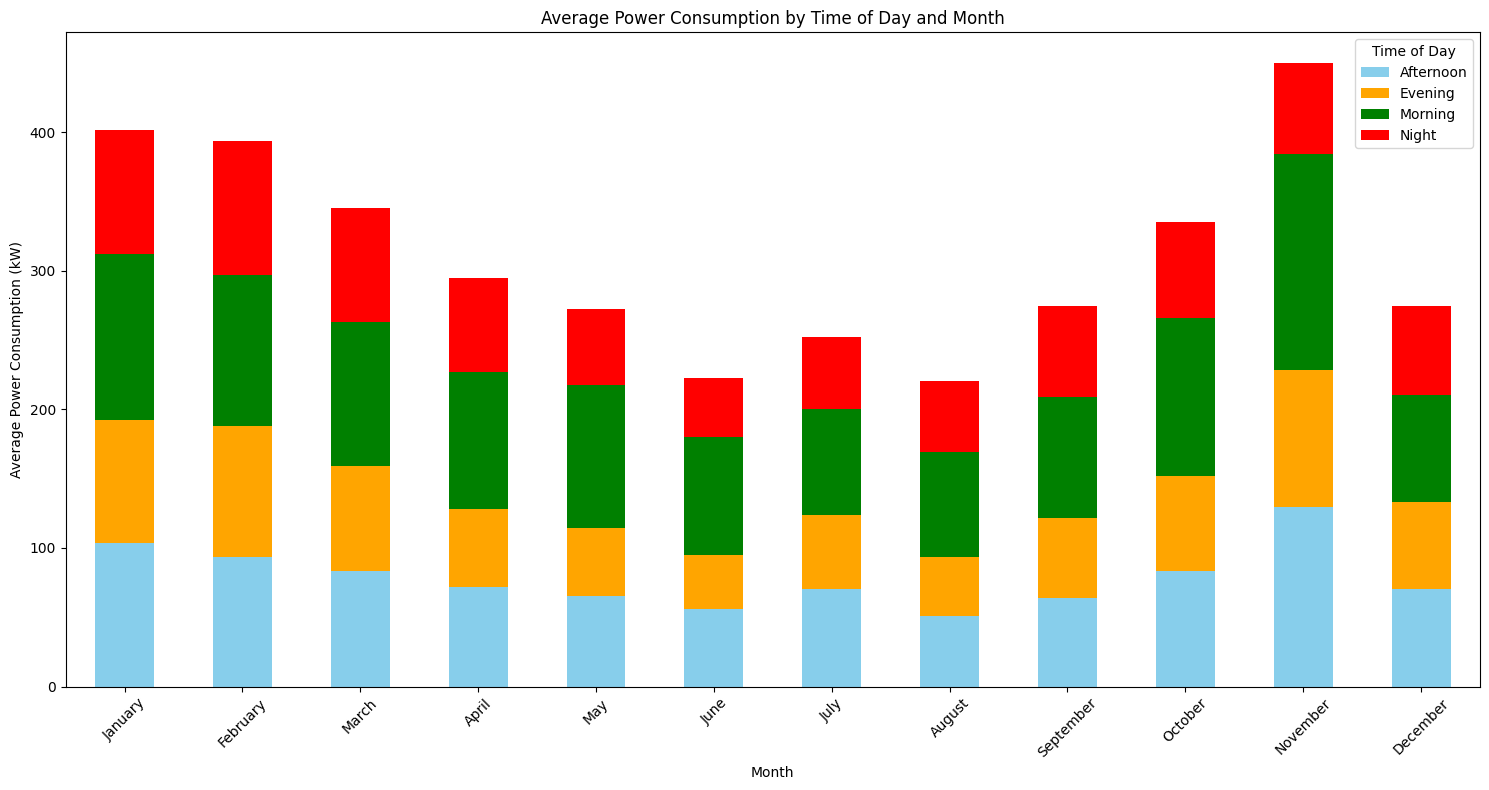

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Define time bins
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 19 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the binning function
df_1h['time_of_day'] = df_1h['timestamp'].dt.hour.apply(time_of_day)
df_1h['month'] = df_1h['timestamp'].dt.strftime('%B')  # Extract month name

# Define the order of months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert month column to categorical type with ordered levels
df_1h['month'] = pd.Categorical(df_1h['month'], categories=month_order, ordered=True)

# Aggregate data by time of day and month
time_of_day_avg_per_month = df_1h.groupby(['month', 'time_of_day'])['main_meter(kW)'].mean().unstack()

# Plotting
time_of_day_avg_per_month.plot(kind='bar', stacked=True, figsize=(15, 8), color=['skyblue', 'orange', 'green', 'red'])
plt.title('Average Power Consumption by Time of Day and Month')
plt.ylabel('Average Power Consumption (kW)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()


In [117]:
df_1h['day_of_week'] = df_1h['timestamp'].dt.day_name() #to get the day, so as to use for offices

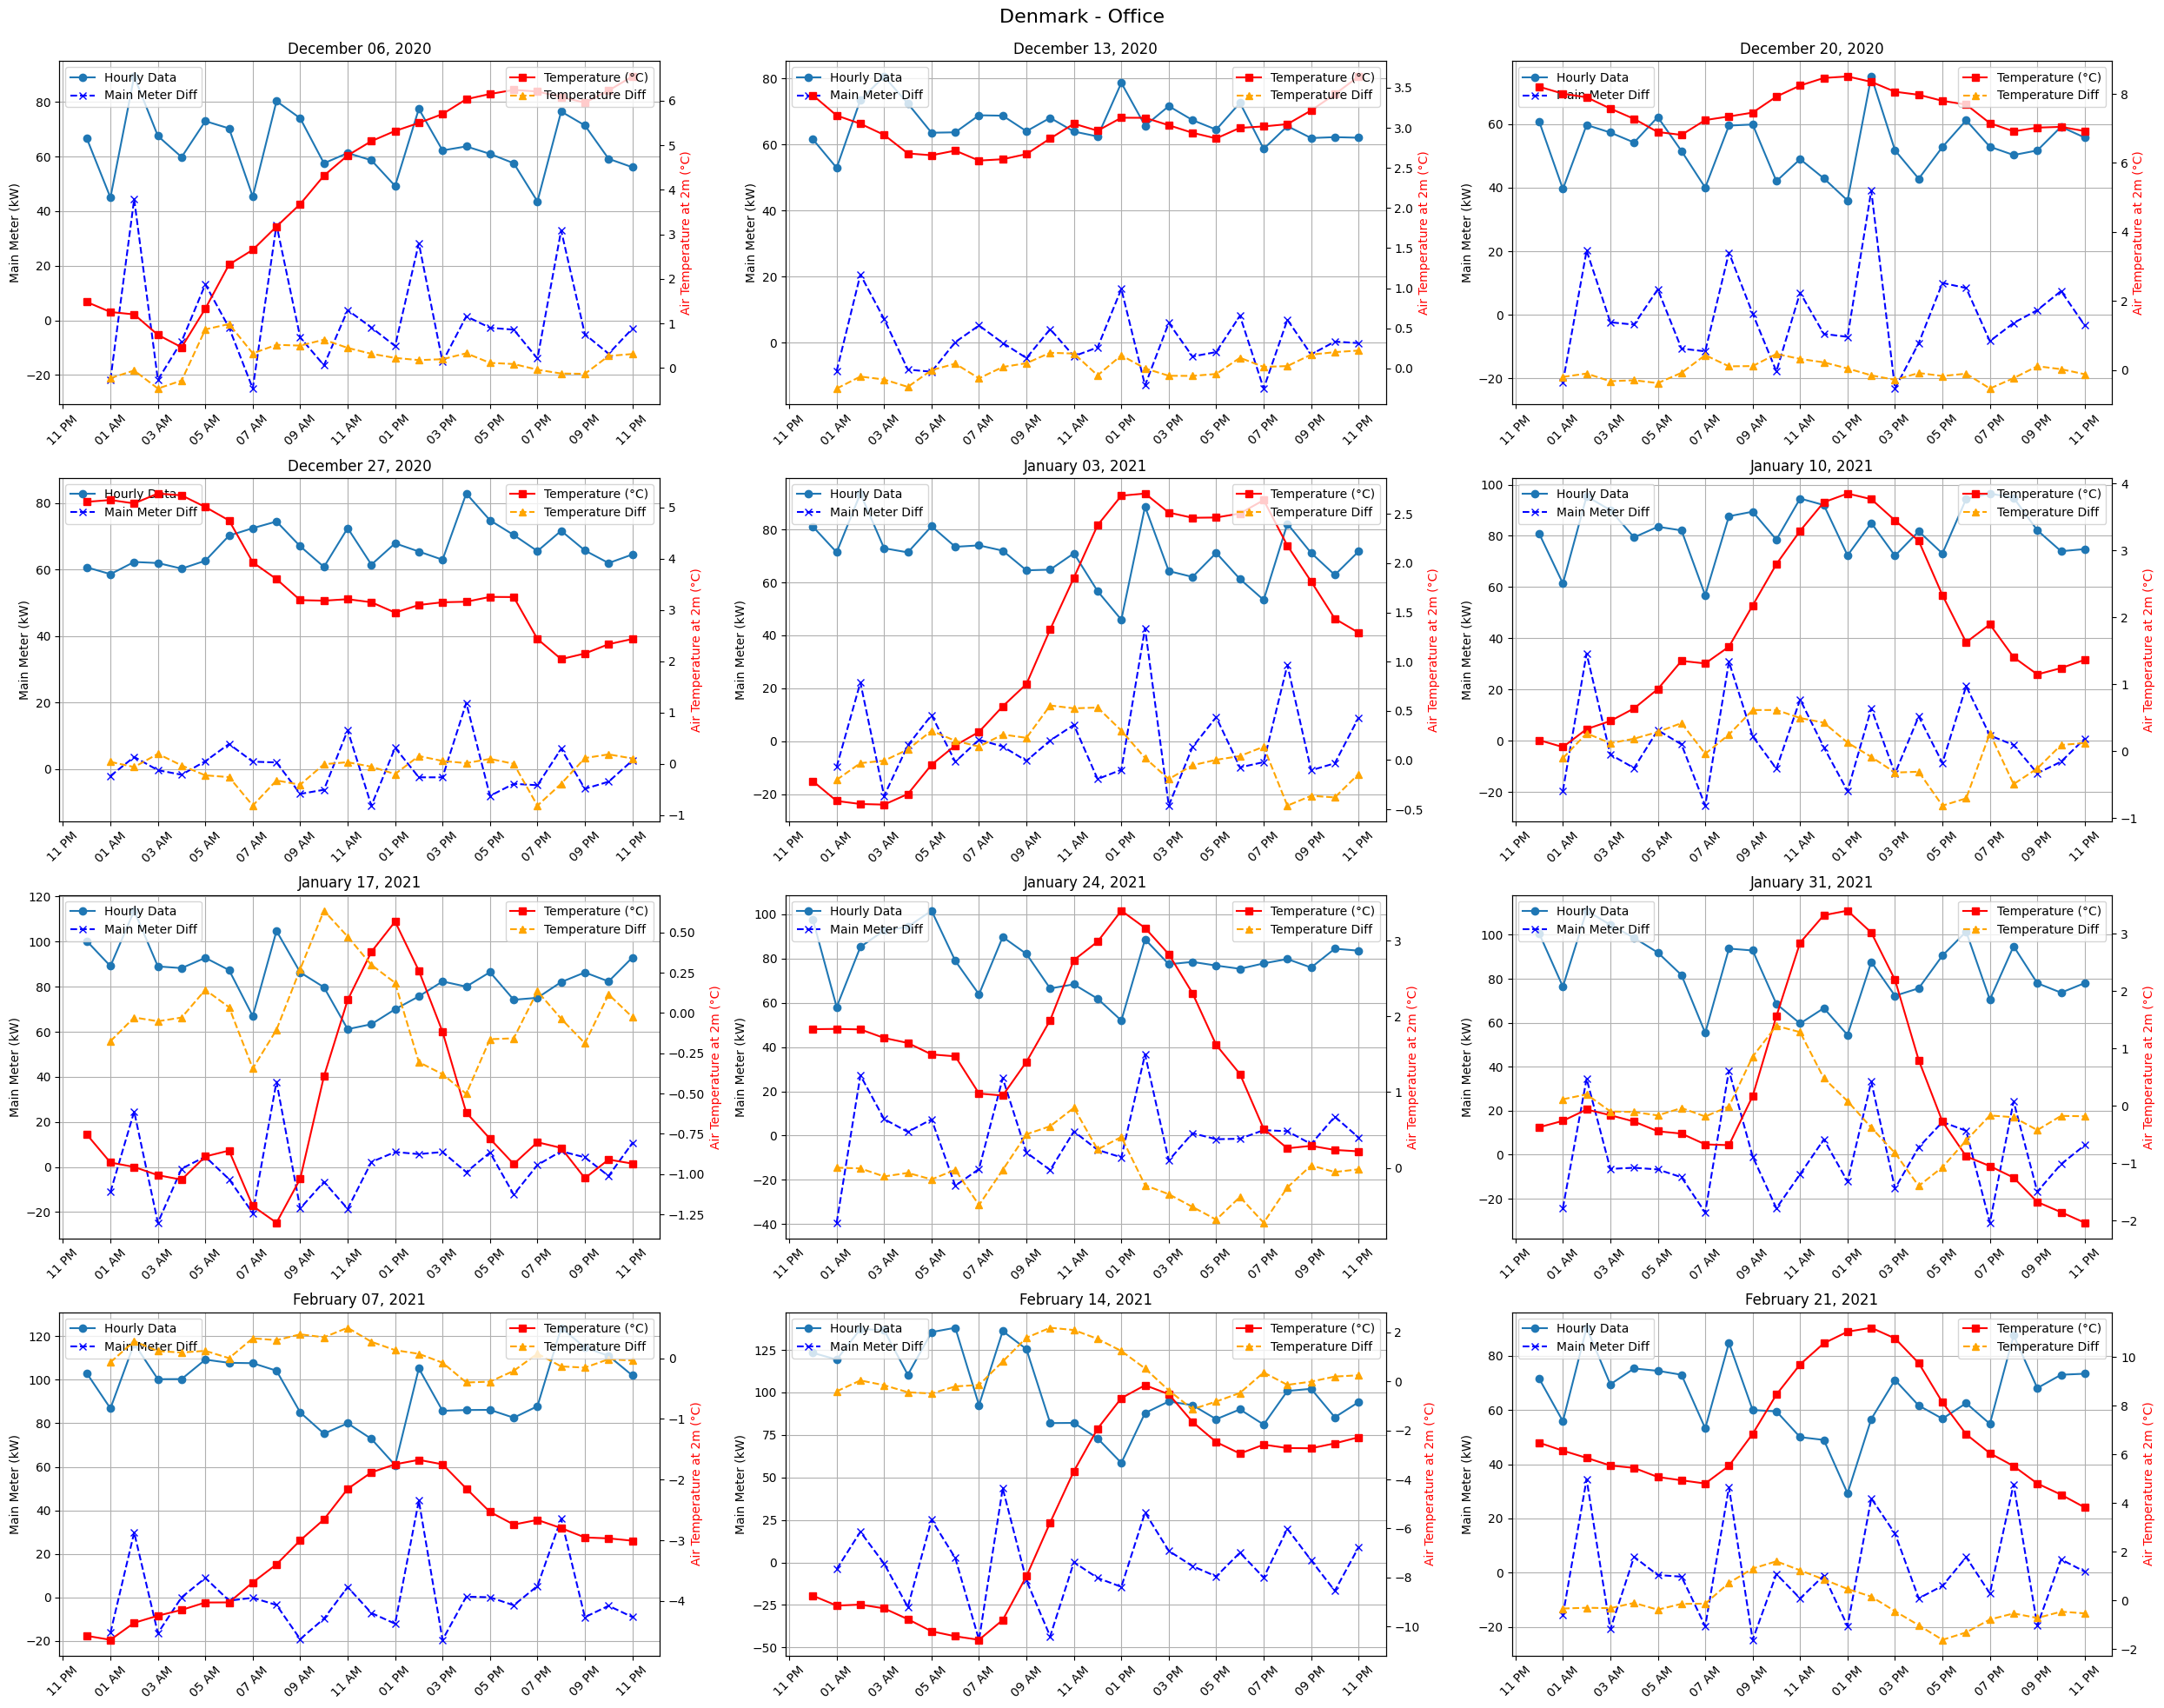

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming df_1h and df_weather are your DataFrames and already loaded

# Convert the 'timestamp' column to datetime for all DataFrames
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Create a list of Sundays for each month
dates = pd.date_range(start='2020-12-01', end='2021-11-01', freq='W-SUN').date

# Limit dates to 12 (if there are more than 12 Sundays)
dates = dates[:12]

# Create a 3x4 grid of subplots (adjust according to the number of Sundays)
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each Sunday and create the plot
for i, date in enumerate(dates):
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_weather = df_weather[df_weather['timestamp'].dt.date == pd.to_datetime(date).date()]

    if not one_day_hourly.empty and not one_day_weather.empty:
        # Calculate the derivative for main_meter(kW) data
        main_meter_diff = one_day_hourly['main_meter(kW)'].diff() / (one_day_hourly['timestamp'].diff().dt.total_seconds() / 3600)

        # Plot hourly data
        axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', label='Hourly Data')
        axes[i].plot(one_day_hourly['timestamp'], main_meter_diff, marker='x', linestyle='--', color='blue', label='Main Meter Diff')

        axes[i].set_ylabel('Main Meter (kW)')
        axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
        axes[i].grid(True)
        axes[i].legend(loc='upper left')

        # Plot weather data
        ax2 = axes[i].twinx()
        air_temp_diff = one_day_weather['air_temperature_at_2m(deg_C)'].diff() / (one_day_weather['timestamp'].diff().dt.total_seconds() / 3600)
        ax2.plot(one_day_weather['timestamp'], one_day_weather['air_temperature_at_2m(deg_C)'], marker='s', color='red', label='Temperature (°C)')
        ax2.plot(one_day_weather['timestamp'], air_temp_diff, marker='^', linestyle='--', color='orange', label='Temperature Diff')
        ax2.set_ylabel('Air Temperature at 2m (°C)', color='red')
        ax2.legend(loc='upper right')

        # Limit x-ticks to avoid max ticks error
        ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set interval to 2 hours
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for the last subplot
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
fig.suptitle('Denmark - Office', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()


### To calculate base load
### sat and sun both are holidays [checked using power ratings]

In [119]:
# Filter out Saturdays and Sundays
non_weekend_df = df_1h[~df_1h['day_of_week'].isin(['Saturday', 'Sunday'])]

# Find the top 10 minimum observed 'main_meter(kW)' ratings
top_10_min_ratings = non_weekend_df.nsmallest(10, 'main_meter(kW)')

top_10_min_ratings

#Take 1 as the minimum load, as it is what is shown if we take only saturday and sunday to caluclate the baseline
# minimum load from below data if the mae comes less (use 12-14...)

timestamp  main_meter(kW) time_of_day    month  \
5124 2021-07-02 12:00:00+00:00        4.517241   Afternoon     July   
4622 2021-06-11 14:00:00+00:00       11.578947   Afternoon     June   
744  2021-01-01 00:00:00+00:00       12.000000       Night  January   
4456 2021-06-04 16:00:00+00:00       12.287082   Afternoon     June   
745  2021-01-01 01:00:00+00:00       13.000000       Night  January   
746  2021-01-01 02:00:00+00:00       13.000000       Night  January   
4745 2021-06-16 17:00:00+00:00       13.000000   Afternoon     June   
4743 2021-06-16 15:00:00+00:00       14.261905   Afternoon     June   
4744 2021-06-16 16:00:00+00:00       16.166666   Afternoon     June   
4454 2021-06-04 14:00:00+00:00       16.216217   Afternoon     June   

     day_of_week  
5124      Friday  
4622      Friday  
744       Friday  
4456      Friday  
745       Friday  
746       Friday  
4745   Wednesday  
4743   Wednesday  
4744   Wednesday  
4454      Friday

## Baseline load for each DAY - minimum of each month

In [120]:
import pandas as pd

# Assuming df_1h is your DataFrame and already loaded

# Filter out Saturdays and Sundays
non_weekend_df = df_1h[~df_1h['day_of_week'].isin(['Saturday', 'Sunday'])]

# Find the top 20 minimum observed 'main_meter(kW)' ratings
top_20_min_ratings = non_weekend_df.nsmallest(20, 'main_meter(kW)')

# Create a new column for baseline load
df_1h['baseline_load_month'] = None

# Iterate over each unique month and find the minimum load for that month
for month in df_1h['timestamp'].dt.to_period('M').unique():

    month_df = non_weekend_df[non_weekend_df['timestamp'].dt.to_period('M') == month]
    
    if not month_df.empty:
        # Get the minimum load for this month
        min_load = month_df['main_meter(kW)'].min()
        
        # Assign the minimum load to all days in this month
        df_1h.loc[df_1h['timestamp'].dt.to_period('M') == month, 'baseline_load_month'] = min_load

# Now, df_1h has a new column 'baseline_load' with the minimum load observed for each month
df_1h.head()


timestamp  main_meter(kW) time_of_day     month day_of_week  \
0 2020-12-01 00:00:00+00:00       69.778595       Night  December     Tuesday   
1 2020-12-01 01:00:00+00:00       52.449440       Night  December     Tuesday   
2 2020-12-01 02:00:00+00:00       72.574860       Night  December     Tuesday   
3 2020-12-01 03:00:00+00:00       67.813957       Night  December     Tuesday   
4 2020-12-01 04:00:00+00:00       65.743805       Night  December     Tuesday   

  baseline_load_month  
0           38.666668  
1           38.666668  
2           38.666668  
3           38.666668  
4           38.666668

## Baseline load for each DAY - minimum of each day

In [121]:
# Iterate over each unique day and find the minimum load for that day
df_1h['baseline_load_day'] = None

for day in df_1h['timestamp'].dt.to_period('D').unique():

    # Filter the DataFrame for the specific day
    day_df = df_1h[df_1h['timestamp'].dt.to_period('D') == day]
    
    if not day_df.empty:
        # Get the minimum load for this day
        min_load = day_df['main_meter(kW)'].min()
        
        # Assign the minimum load to all timestamps in this day
        df_1h.loc[df_1h['timestamp'].dt.to_period('D') == day, 'baseline_load_day'] = min_load

# Now, df_1h has a new column 'baseline_load' with the minimum load observed for each day
df_1h.head()


timestamp  main_meter(kW) time_of_day     month day_of_week  \
0 2020-12-01 00:00:00+00:00       69.778595       Night  December     Tuesday   
1 2020-12-01 01:00:00+00:00       52.449440       Night  December     Tuesday   
2 2020-12-01 02:00:00+00:00       72.574860       Night  December     Tuesday   
3 2020-12-01 03:00:00+00:00       67.813957       Night  December     Tuesday   
4 2020-12-01 04:00:00+00:00       65.743805       Night  December     Tuesday   

  baseline_load_month baseline_load_day  
0           38.666668          52.44944  
1           38.666668          52.44944  
2           38.666668          52.44944  
3           38.666668          52.44944  
4           38.666668          52.44944

In [122]:
df_1h['baseline_load_day'] = 0
df_1h['baseline_load_month'] = 0

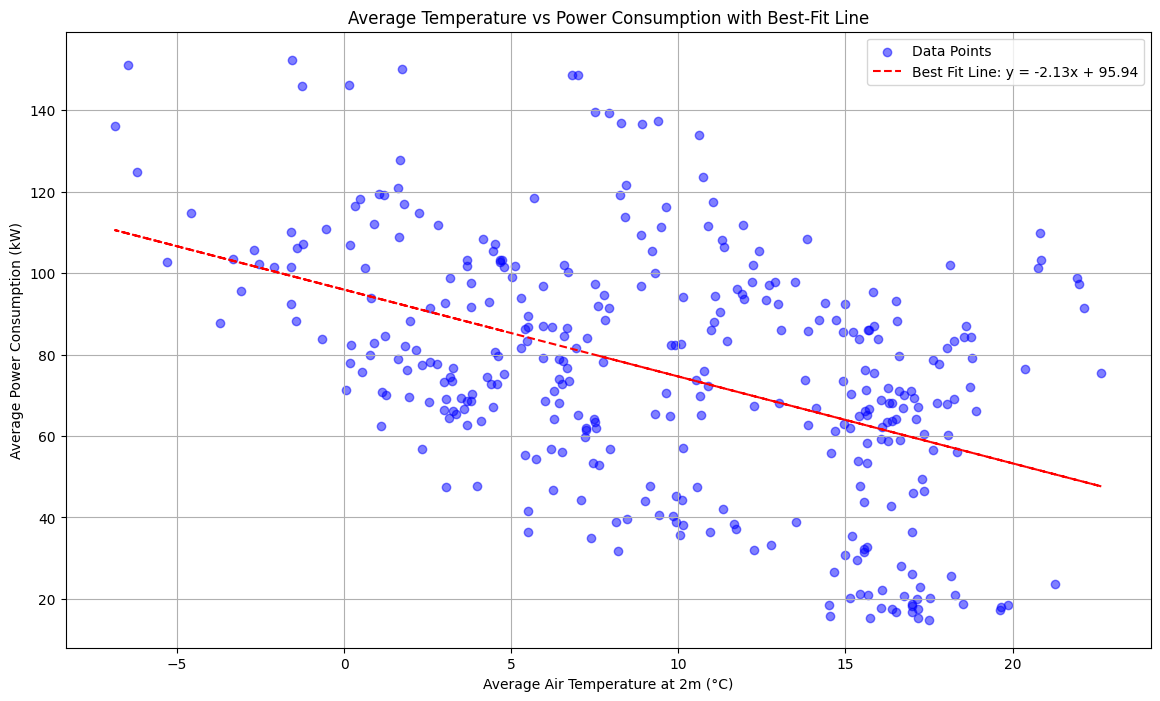

In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_1h and df_weather are your DataFrames and already loaded

# Convert 'timestamp' to datetime if not already done
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Merge the two dataframes on timestamp (inner join to keep only matching times)
df_merged = pd.merge(df_1h, df_weather, on='timestamp', how='inner')

# Select only the numeric columns for averaging (e.g., temperature and power consumption)
df_numeric = df_merged[['timestamp', 'main_meter(kW)', 'air_temperature_at_2m(deg_C)']]

# Resample data to calculate daily averages
df_daily_avg = df_numeric.resample('D', on='timestamp').mean()

# Extract the relevant columns for plotting
x = df_daily_avg['air_temperature_at_2m(deg_C)']
y = df_daily_avg['main_meter(kW)']

# Plotting the data
plt.figure(figsize=(14, 8))
plt.scatter(x, y, color='blue', alpha=0.5, label='Data Points')

# Calculate the line of best fit
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
y_fit = polynomial(x)

# Plot the best-fit line
plt.plot(x, y_fit, color='red', linestyle='--', label=f'Best Fit Line: y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}')

# Add labels and title
plt.xlabel('Average Air Temperature at 2m (°C)')
plt.ylabel('Average Power Consumption (kW)')
plt.title('Average Temperature vs Power Consumption with Best-Fit Line')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


In [124]:
import pandas as pd

# Constants
area = 8685  # area in square meters
base_temperature = 18  # base temperature in °C (common threshold for heating needs)

# Consumption rates (in kW per square meter)
lighting_kw_per_sqm = 0.005  # kW/m^2 (based on 15 W/m^2)
equipment_kw_per_sqm = 0.000  # kW/m^2 (based on 25 W/m^2)

# Calculate total lighting and equipment consumption for the area
total_lighting_kw = lighting_kw_per_sqm * area  # Lights on from 9 AM to 9 PM
total_equipment_kw = equipment_kw_per_sqm * area  # Equipment on from 9 AM to 6 PM

# Assuming df_weather has columns 'timestamp' and 'air_temperature_at_2m(deg_C)'
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Merge power consumption data (df_1h) with weather data (df_weather)
df_merged = pd.merge(df_1h, df_weather, on='timestamp', how='inner')

# Filter the DataFrame for office hours
df_merged['hour'] = df_merged['timestamp'].dt.hour
df_office_hours = df_merged[(df_merged['hour'] >= 9) & (df_merged['hour'] < 21)]  # 9 AM to 9 PM for lights
df_office_hours['lights_on'] = df_office_hours['hour'] < 21  # Lights on until 9 PM
df_office_hours['equipment_on'] = df_office_hours['hour'] < 18  # Equipment on until 6 PM

# Calculate the expected power consumption from lights and equipment
df_office_hours['expected_lights_kw'] = df_office_hours['lights_on'] * total_lighting_kw
df_office_hours['expected_equipment_kw'] = df_office_hours['equipment_on'] * total_equipment_kw

# Calculate temperature-adjusted baseline load (assuming a linear relationship between temperature and heating)
df_office_hours['temp_adjustment'] = (base_temperature - df_office_hours['air_temperature_at_2m(deg_C)']).clip(lower=0)
df_office_hours['adjusted_baseline'] = df_office_hours['baseline_load_month'] + df_office_hours['temp_adjustment']
# df_office_hours['adjusted_baseline'] = 0
# Calculate the heating component considering temperature
df_office_hours['heating_kw'] = df_office_hours['main_meter(kW)'] - df_office_hours['adjusted_baseline'] - df_office_hours['expected_lights_kw'] - df_office_hours['expected_equipment_kw']

# Display the results
df_office_hours[['timestamp', 'main_meter(kW)', 'baseline_load_month', 'adjusted_baseline', 'expected_lights_kw', 'expected_equipment_kw', 'heating_kw']].head()


timestamp  main_meter(kW)  baseline_load_month  \
9  2020-12-01 09:00:00+00:00      109.571426                    0   
10 2020-12-01 10:00:00+00:00       92.888885                    0   
11 2020-12-01 11:00:00+00:00       94.227997                    0   
12 2020-12-01 12:00:00+00:00       81.337662                    0   
13 2020-12-01 13:00:00+00:00       65.939819                    0   

    adjusted_baseline  expected_lights_kw  expected_equipment_kw  heating_kw  
9           13.389101              43.425                    0.0   52.757325  
10          12.909794              43.425                    0.0   36.554091  
11          12.532139              43.425                    0.0   38.270858  
12          12.321046              43.425                    0.0   25.591615  
13          12.314487              43.425                    0.0   10.200333

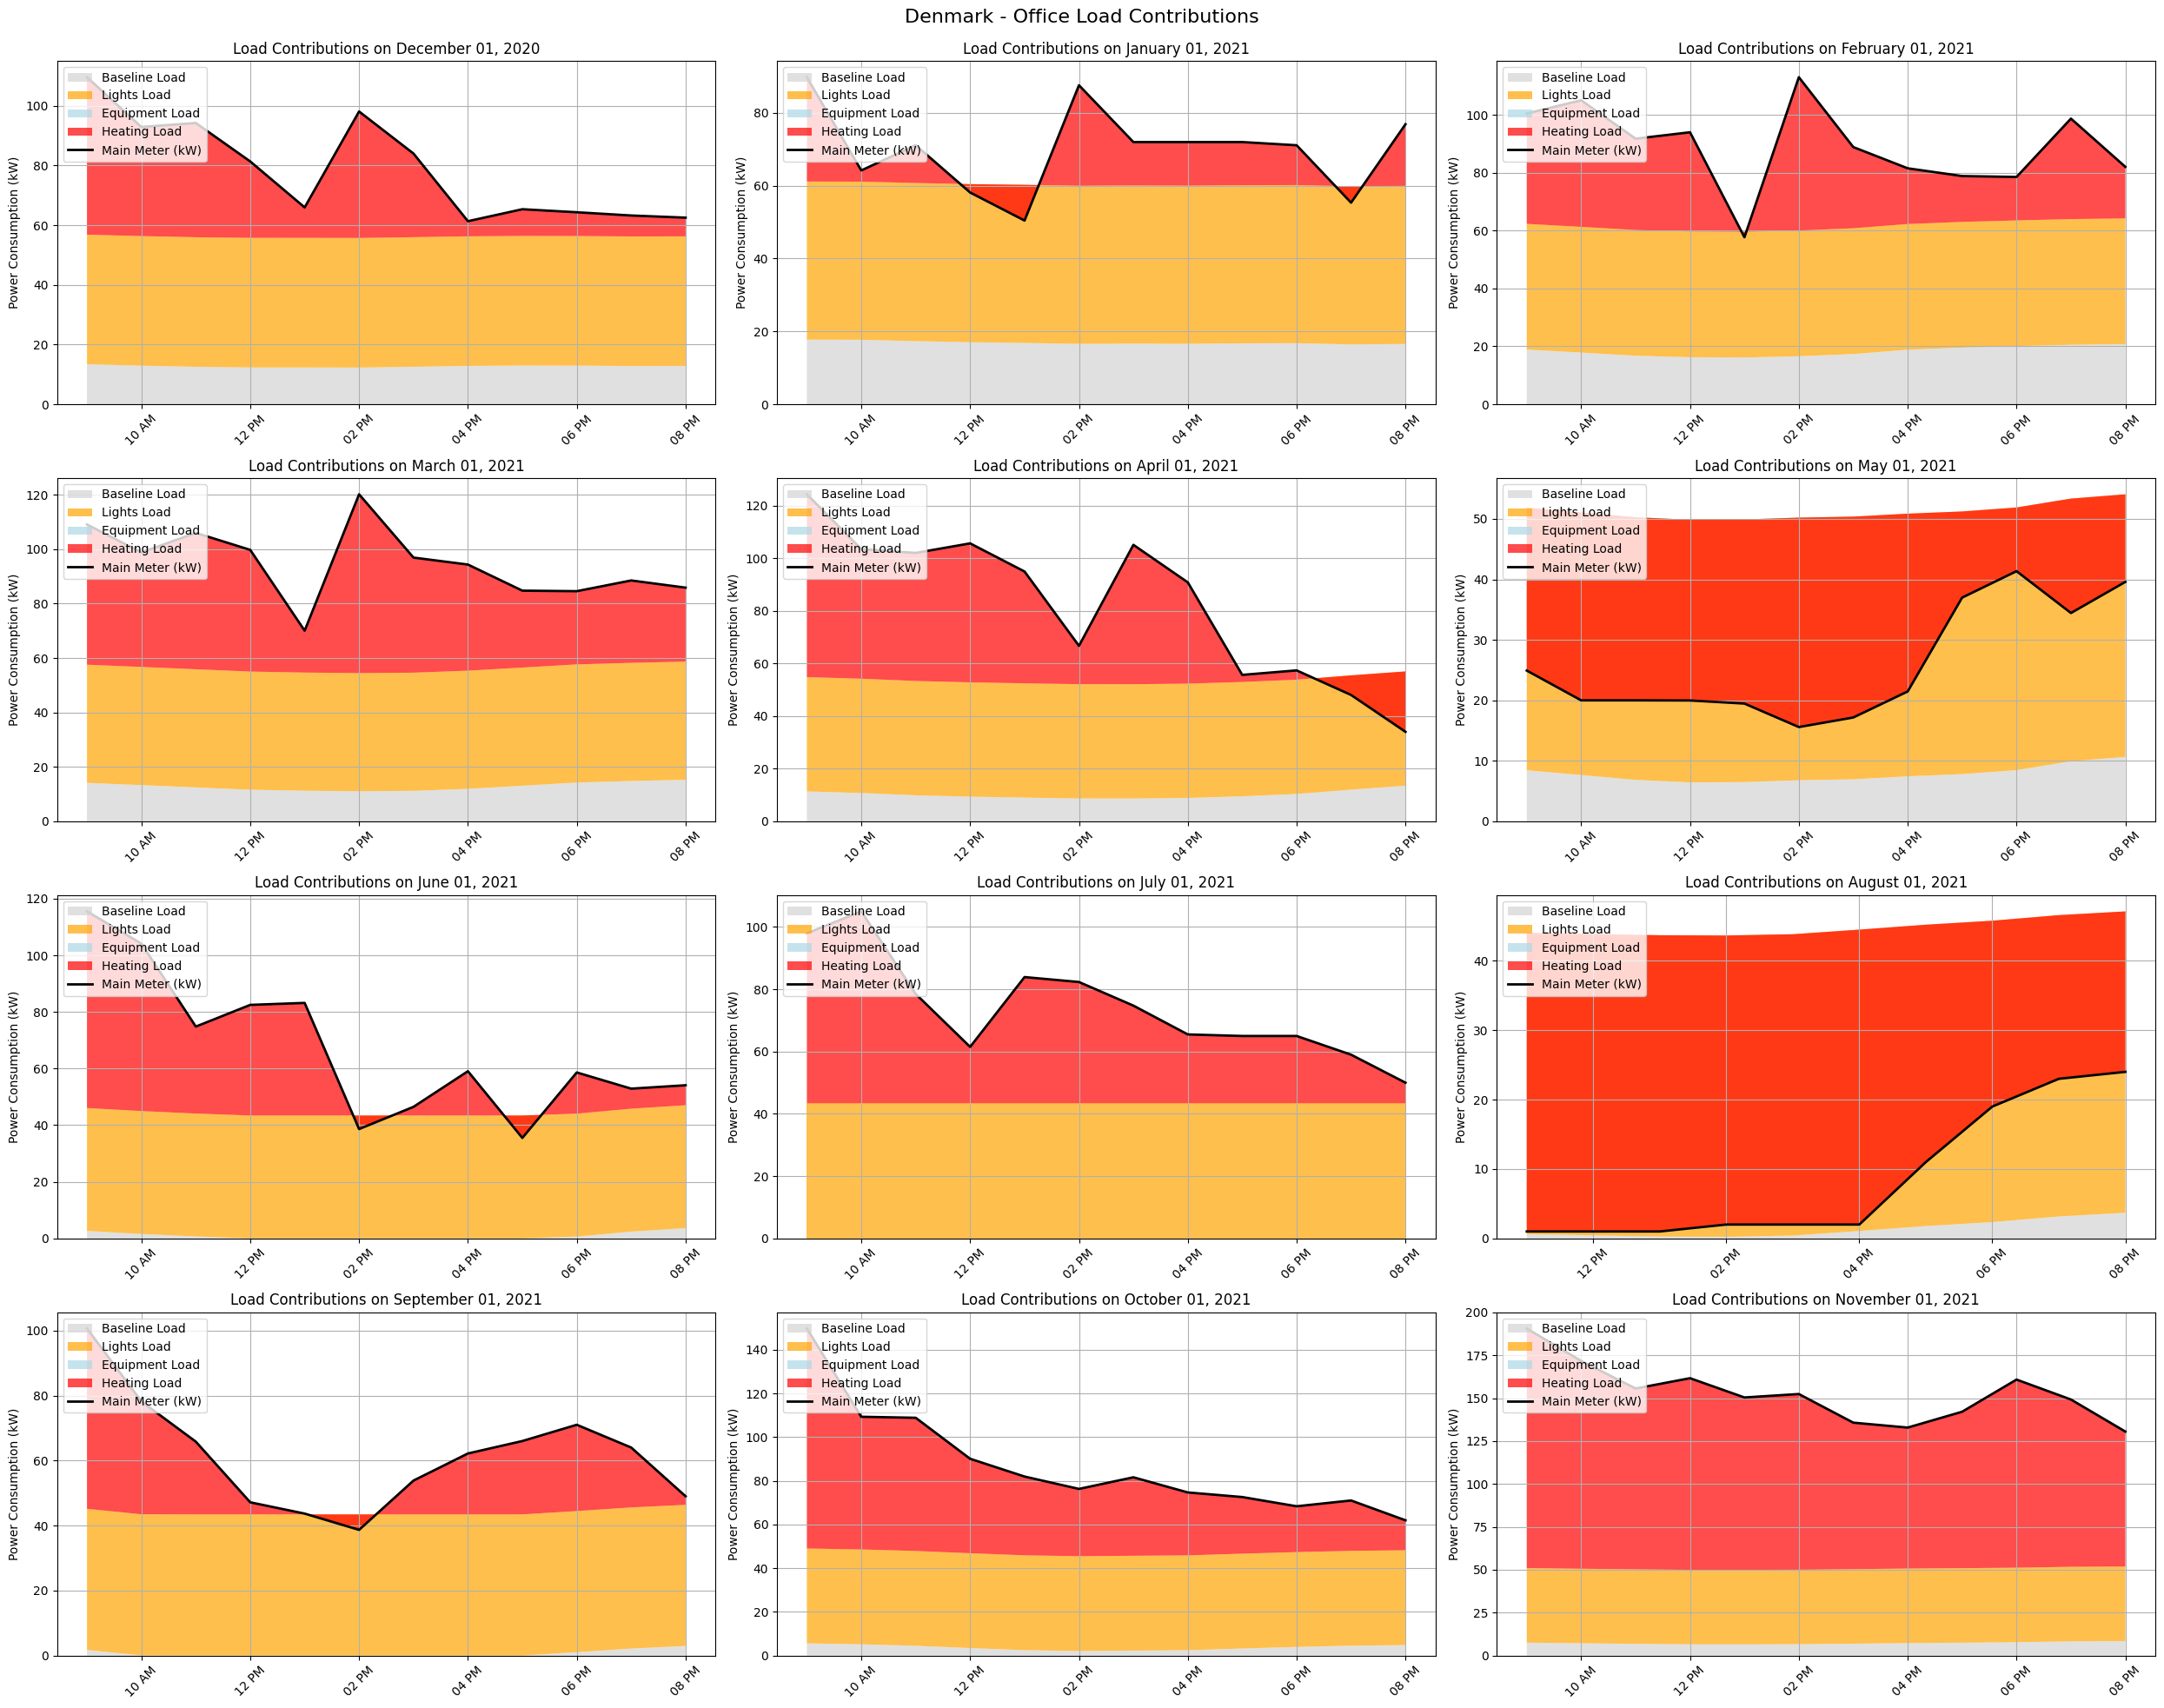

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure columns are numeric and handle any invalid data
numeric_columns = ['main_meter(kW)', 'adjusted_baseline', 'expected_lights_kw', 'expected_equipment_kw', 'heating_kw']
df_office_hours[numeric_columns] = df_office_hours[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
df_office_hours = df_office_hours.dropna(subset=numeric_columns)

# Extract one day from each month for the plot (e.g., the 1st day of each month)
dates = pd.date_range(start='2020-12-01', end='2021-11-01', freq='MS').date
dates = dates[:12]  # Limit to 12 months

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)
axes = axes.flatten()  # Flatten the axes array for easier iteration

# Iterate over each date and create the area plot
for i, date in enumerate(dates):
    # Filter data for the selected day
    day_df = df_office_hours[df_office_hours['timestamp'].dt.date == date]
    
    if not day_df.empty:
        # Plot stacked area chart for different load contributions
        axes[i].stackplot(
            day_df['timestamp'],
            day_df['adjusted_baseline'], day_df['expected_lights_kw'], day_df['expected_equipment_kw'], day_df['heating_kw'],
            labels=['Baseline Load', 'Lights Load', 'Equipment Load', 'Heating Load'],
            colors=['lightgray', 'orange', 'lightblue', 'red'],
            alpha=0.7
        )
        
        # Plot the main meter reading
        axes[i].plot(day_df['timestamp'], day_df['main_meter(kW)'], color='black', linewidth=2, label='Main Meter (kW)')
        
        # Set title and labels
        axes[i].set_title(f'Load Contributions on {date.strftime("%B %d, %Y")}')
        axes[i].set_ylabel('Power Consumption (kW)')
        axes[i].legend(loc='upper left')
        axes[i].grid(True)
        
        # Format x-axis ticks
        axes[i].xaxis.set_major_locator(mdates.HourLocator(interval=2))
        axes[i].xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for better readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and show plot
fig.tight_layout()
fig.suptitle('Denmark - Office Load Contributions', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()


In [ ]:
# 80 percent luminated in working hours, and 10 percent is alwasy luminated(baseline)

# difference betweeen day vs night vs afternoon vs evening -> binning

In [ ]:
max(df_1h['main_meter(kW)']) - min(df_1h['main_meter(kW)'])

284.20588234066963

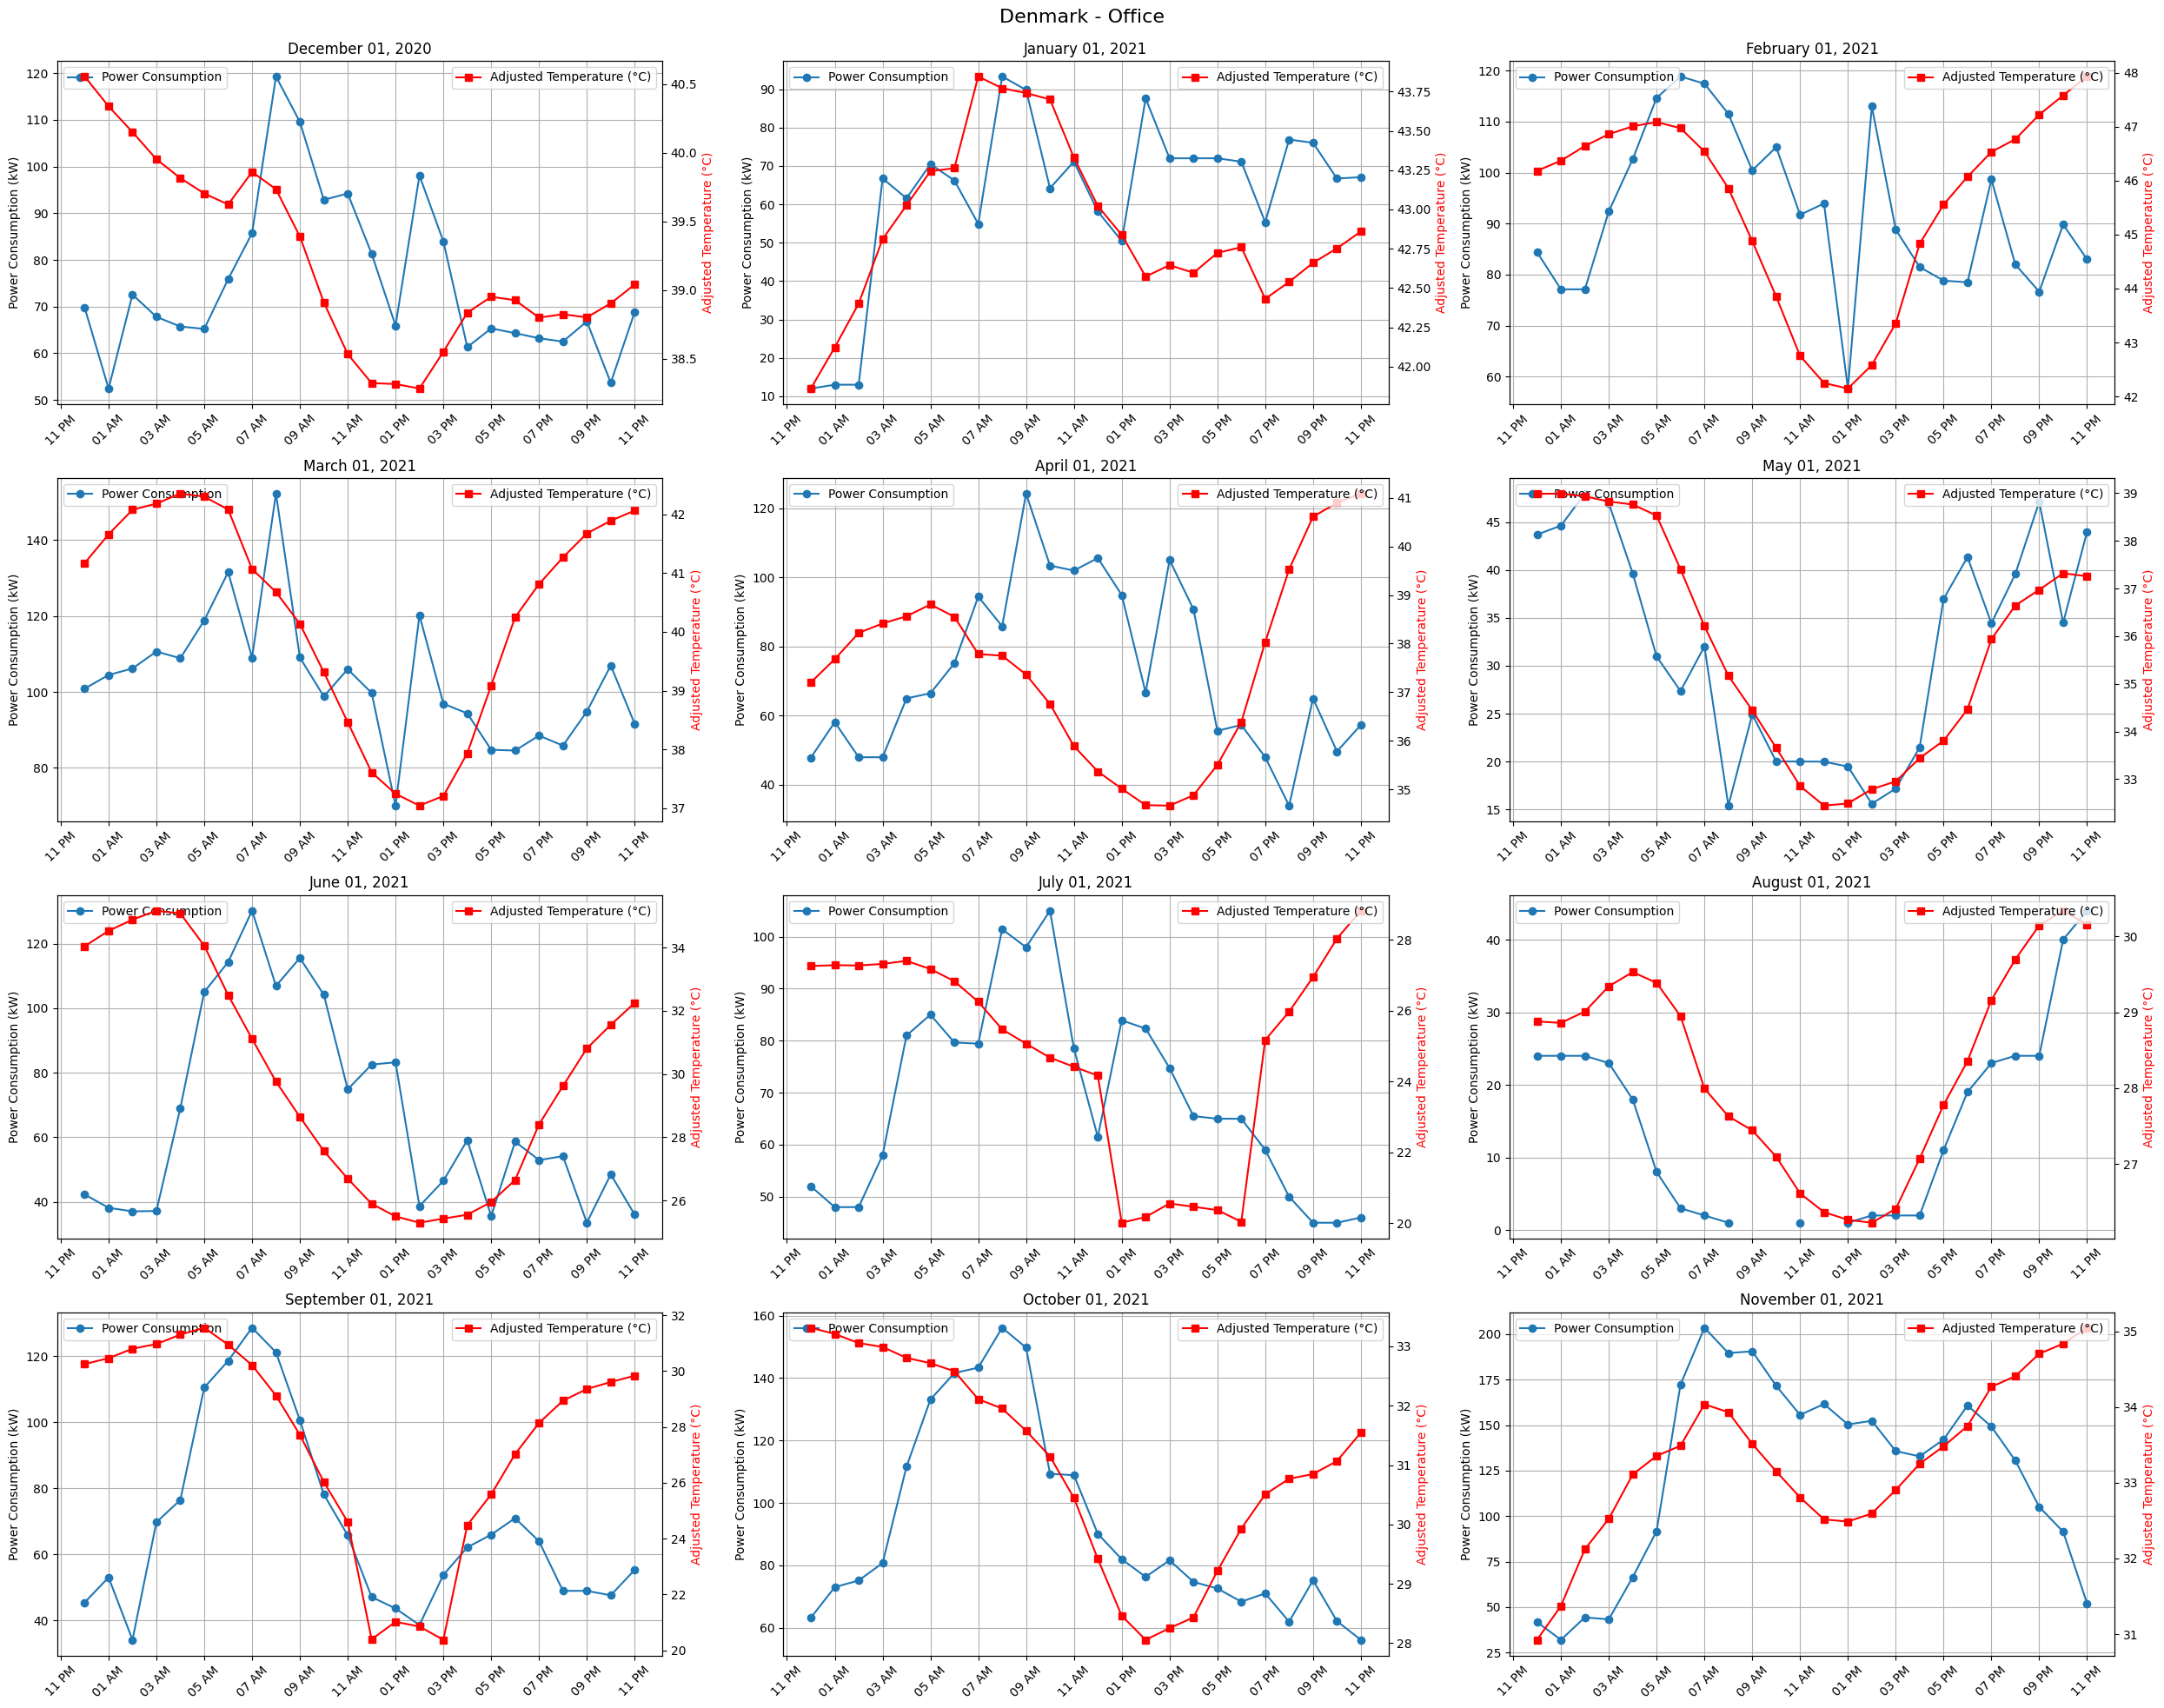

KeyError: 'adjusted_temp'

<Figure size 1200x600 with 0 Axes>

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Assuming df_1h and df_weather are your DataFrames and already loaded

# Convert the 'timestamp' column to datetime for all DataFrames
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Create a list of dates for the first day of each month in 2021
dates = pd.date_range(start='2020-12-01', end='2021-11-01', freq='MS').date

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each date and create the plot
for i, date in enumerate(dates):
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_weather = df_weather[df_weather['timestamp'].dt.date == pd.to_datetime(date).date()]

    # Invert temperatures outside the 18-20 range
    one_day_weather['adjusted_temp'] = np.where(
        (one_day_weather['air_temperature_at_2m(deg_C)'] < 20) | 
        (one_day_weather['air_temperature_at_2m(deg_C)'] > 22), 
        22 - (one_day_weather['air_temperature_at_2m(deg_C)'] - 22), 
        one_day_weather['air_temperature_at_2m(deg_C)']
    )

    # Plot hourly data
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', label='Power Consumption')
    
    axes[i].set_ylabel('Power Consumption (kW)')
    axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Plot adjusted temperature data
    ax2 = axes[i].twinx()
    ax2.plot(one_day_weather['timestamp'], one_day_weather['adjusted_temp'], marker='s', color='red', label='Adjusted Temperature (°C)')
    ax2.set_ylabel('Adjusted Temperature (°C)', color='red')
    ax2.legend(loc='upper right')

    # Limit x-ticks to avoid max ticks error
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set interval to 2 hours
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for the last subplot
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
fig.suptitle('Denmark - Office', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

# Plot Power Consumption vs Adjusted Temperature
plt.figure(figsize=(12, 6))
plt.scatter(df_1h['main_meter(kW)'], df_weather['adjusted_temp'], alpha=0.5)
plt.title('Power Consumption vs Adjusted Temperature')
plt.xlabel('Power Consumption (kW)')
plt.ylabel('Adjusted Temperature (°C)')
plt.grid(True)
plt.show()


ValueError: Input y contains NaN.

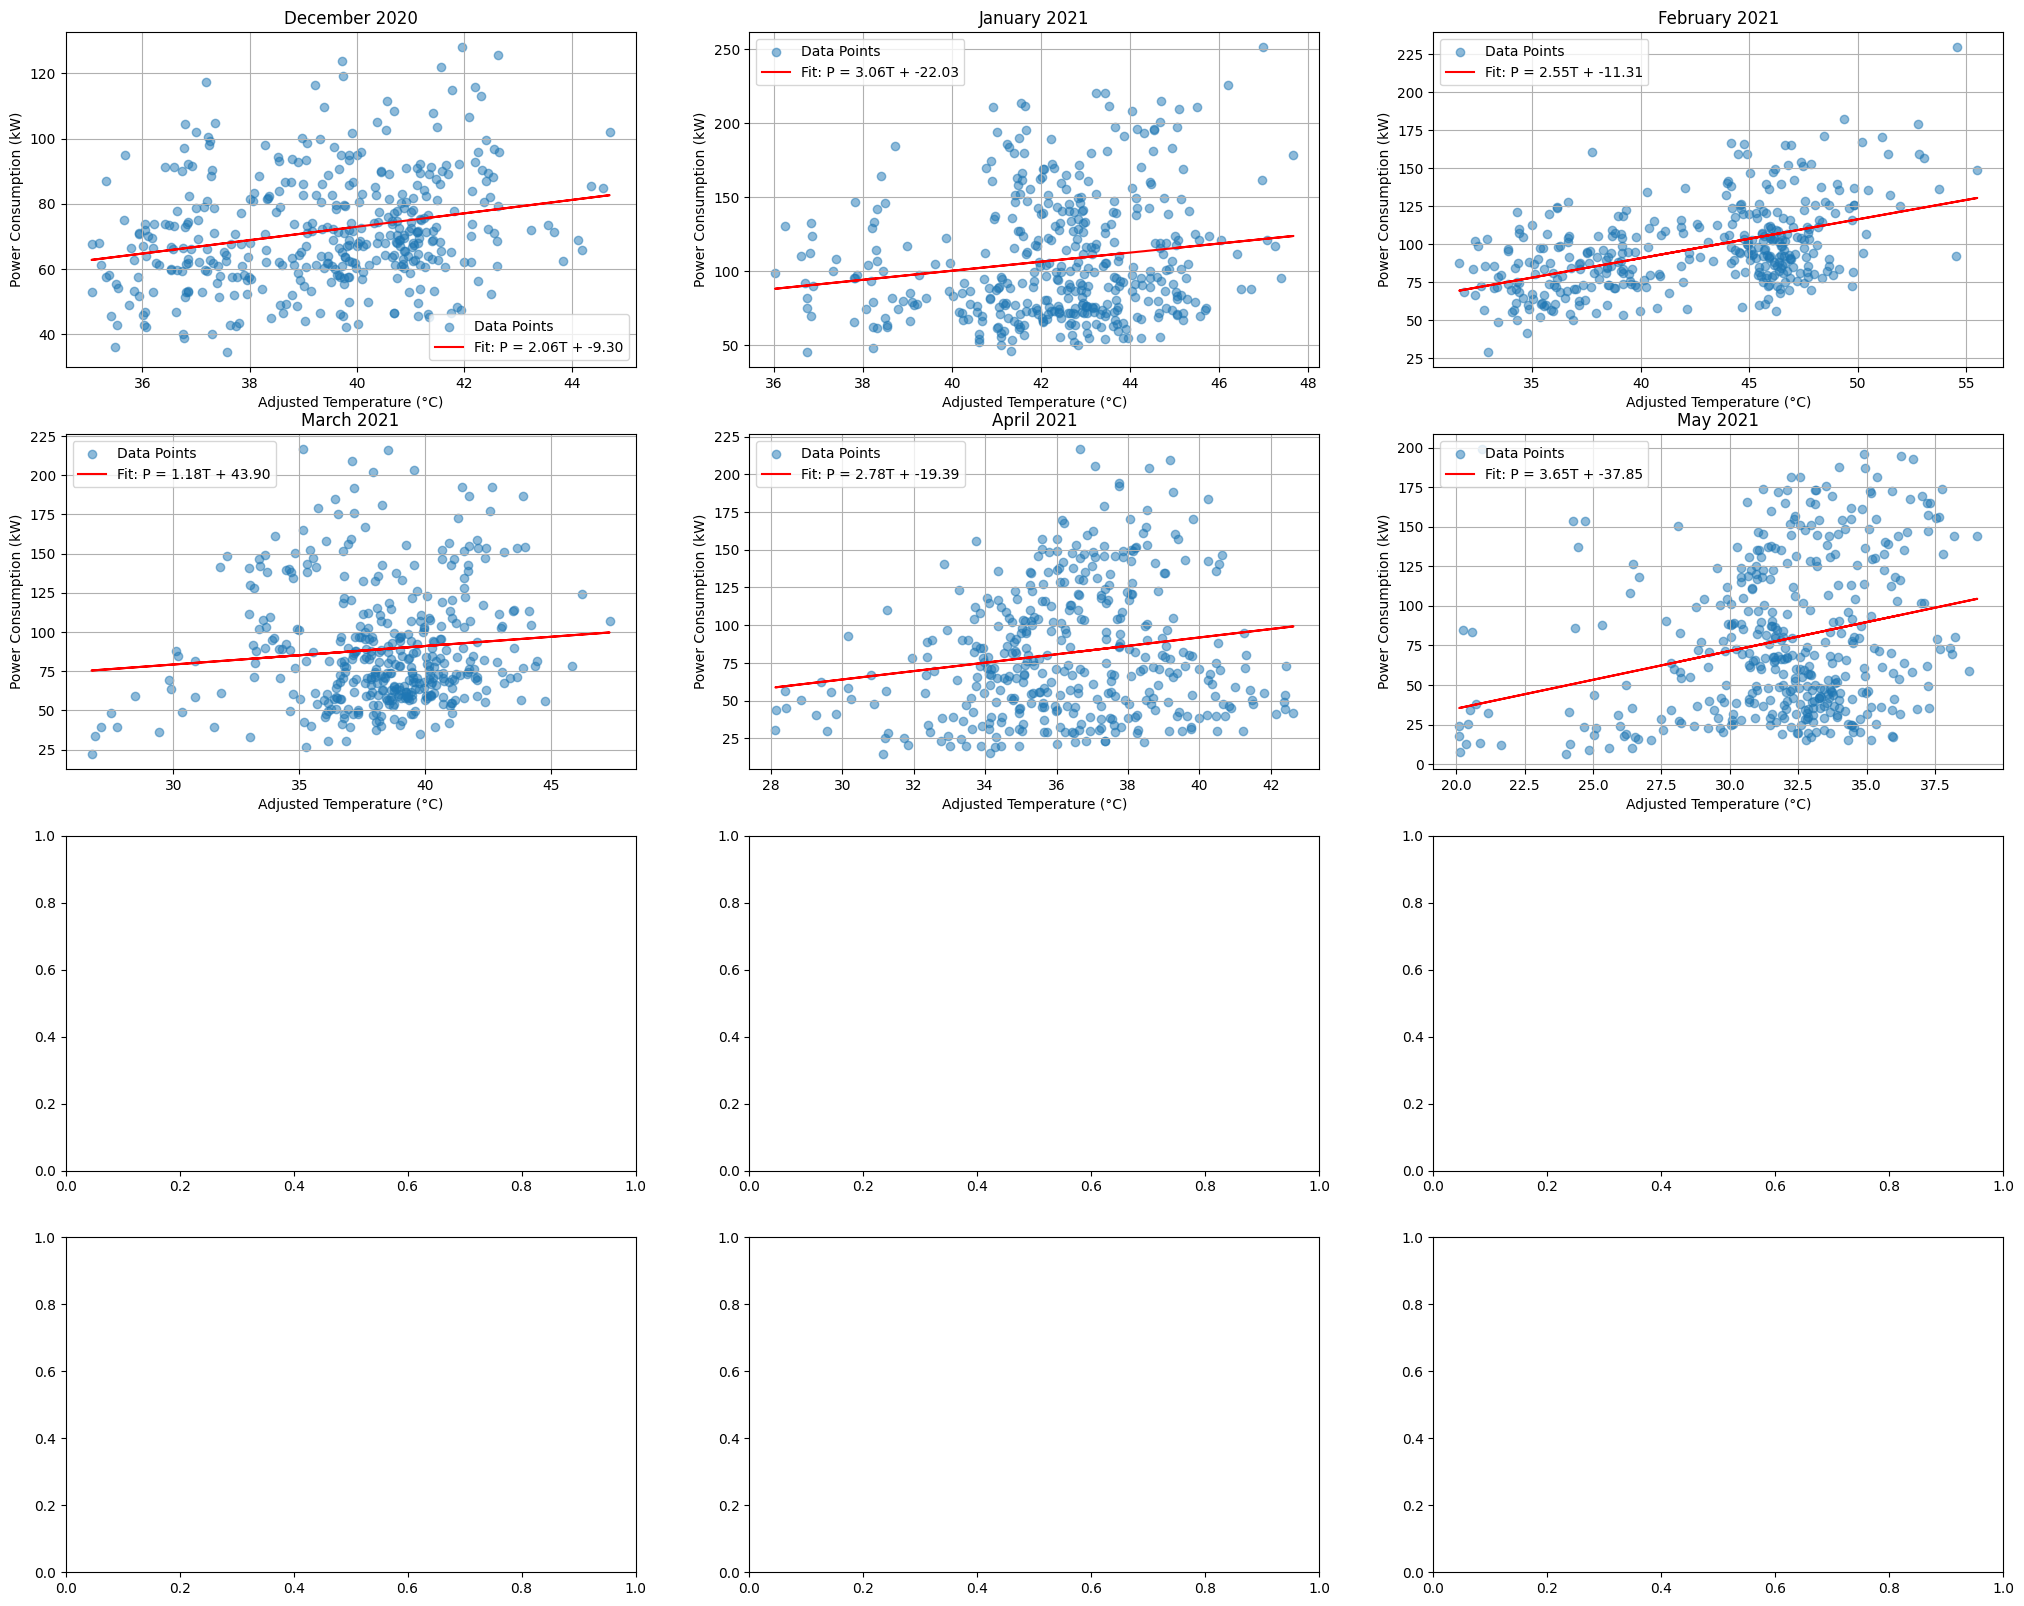

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming df_1h and df_weather are your DataFrames and already loaded

# Convert the 'timestamp' column to datetime for all DataFrames
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Filter data for the time range 7 AM to 7 PM
df_1h_filtered = df_1h[(df_1h['timestamp'].dt.hour >= 7) & (df_1h['timestamp'].dt.hour <= 19)]
df_weather_filtered = df_weather[(df_weather['timestamp'].dt.hour >= 7) & (df_weather['timestamp'].dt.hour <= 19)]

# Merge dataframes on timestamp
df_merged = pd.merge(df_1h_filtered, df_weather_filtered, on='timestamp')

# Invert temperatures outside the 20-22 range
df_merged['adjusted_temp'] = np.where(
    (df_merged['air_temperature_at_2m(deg_C)'] < 20) | 
    (df_merged['air_temperature_at_2m(deg_C)'] > 22), 
    22 - (df_merged['air_temperature_at_2m(deg_C)'] - 22), 
    df_merged['air_temperature_at_2m(deg_C)']
)

# Extract month and year from the timestamp for grouping
df_merged['month'] = df_merged['timestamp'].dt.to_period('M')

# Create a 3x4 grid of subplots for 12 months
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)
axes = axes.flatten()

# Iterate over each month
for i, (month, group) in enumerate(df_merged.groupby('month')):
    X = group[['adjusted_temp']]
    y = group['main_meter(kW)']

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Plot scatter and regression line
    axes[i].scatter(group['adjusted_temp'], group['main_meter(kW)'], alpha=0.5, label='Data Points')
    axes[i].plot(group['adjusted_temp'], y_pred, color='red', label=f'Fit: P = {model.coef_[0]:.2f}T + {model.intercept_:.2f}')

    # Set plot titles and labels
    axes[i].set_title(f'{month.strftime("%B %Y")}')
    axes[i].set_xlabel('Adjusted Temperature (°C)')
    axes[i].set_ylabel('Power Consumption (kW)')
    axes[i].legend()
    axes[i].grid(True)

fig.tight_layout()
fig.suptitle('Power Consumption vs Adjusted Temperature (7 AM - 7 PM)', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()


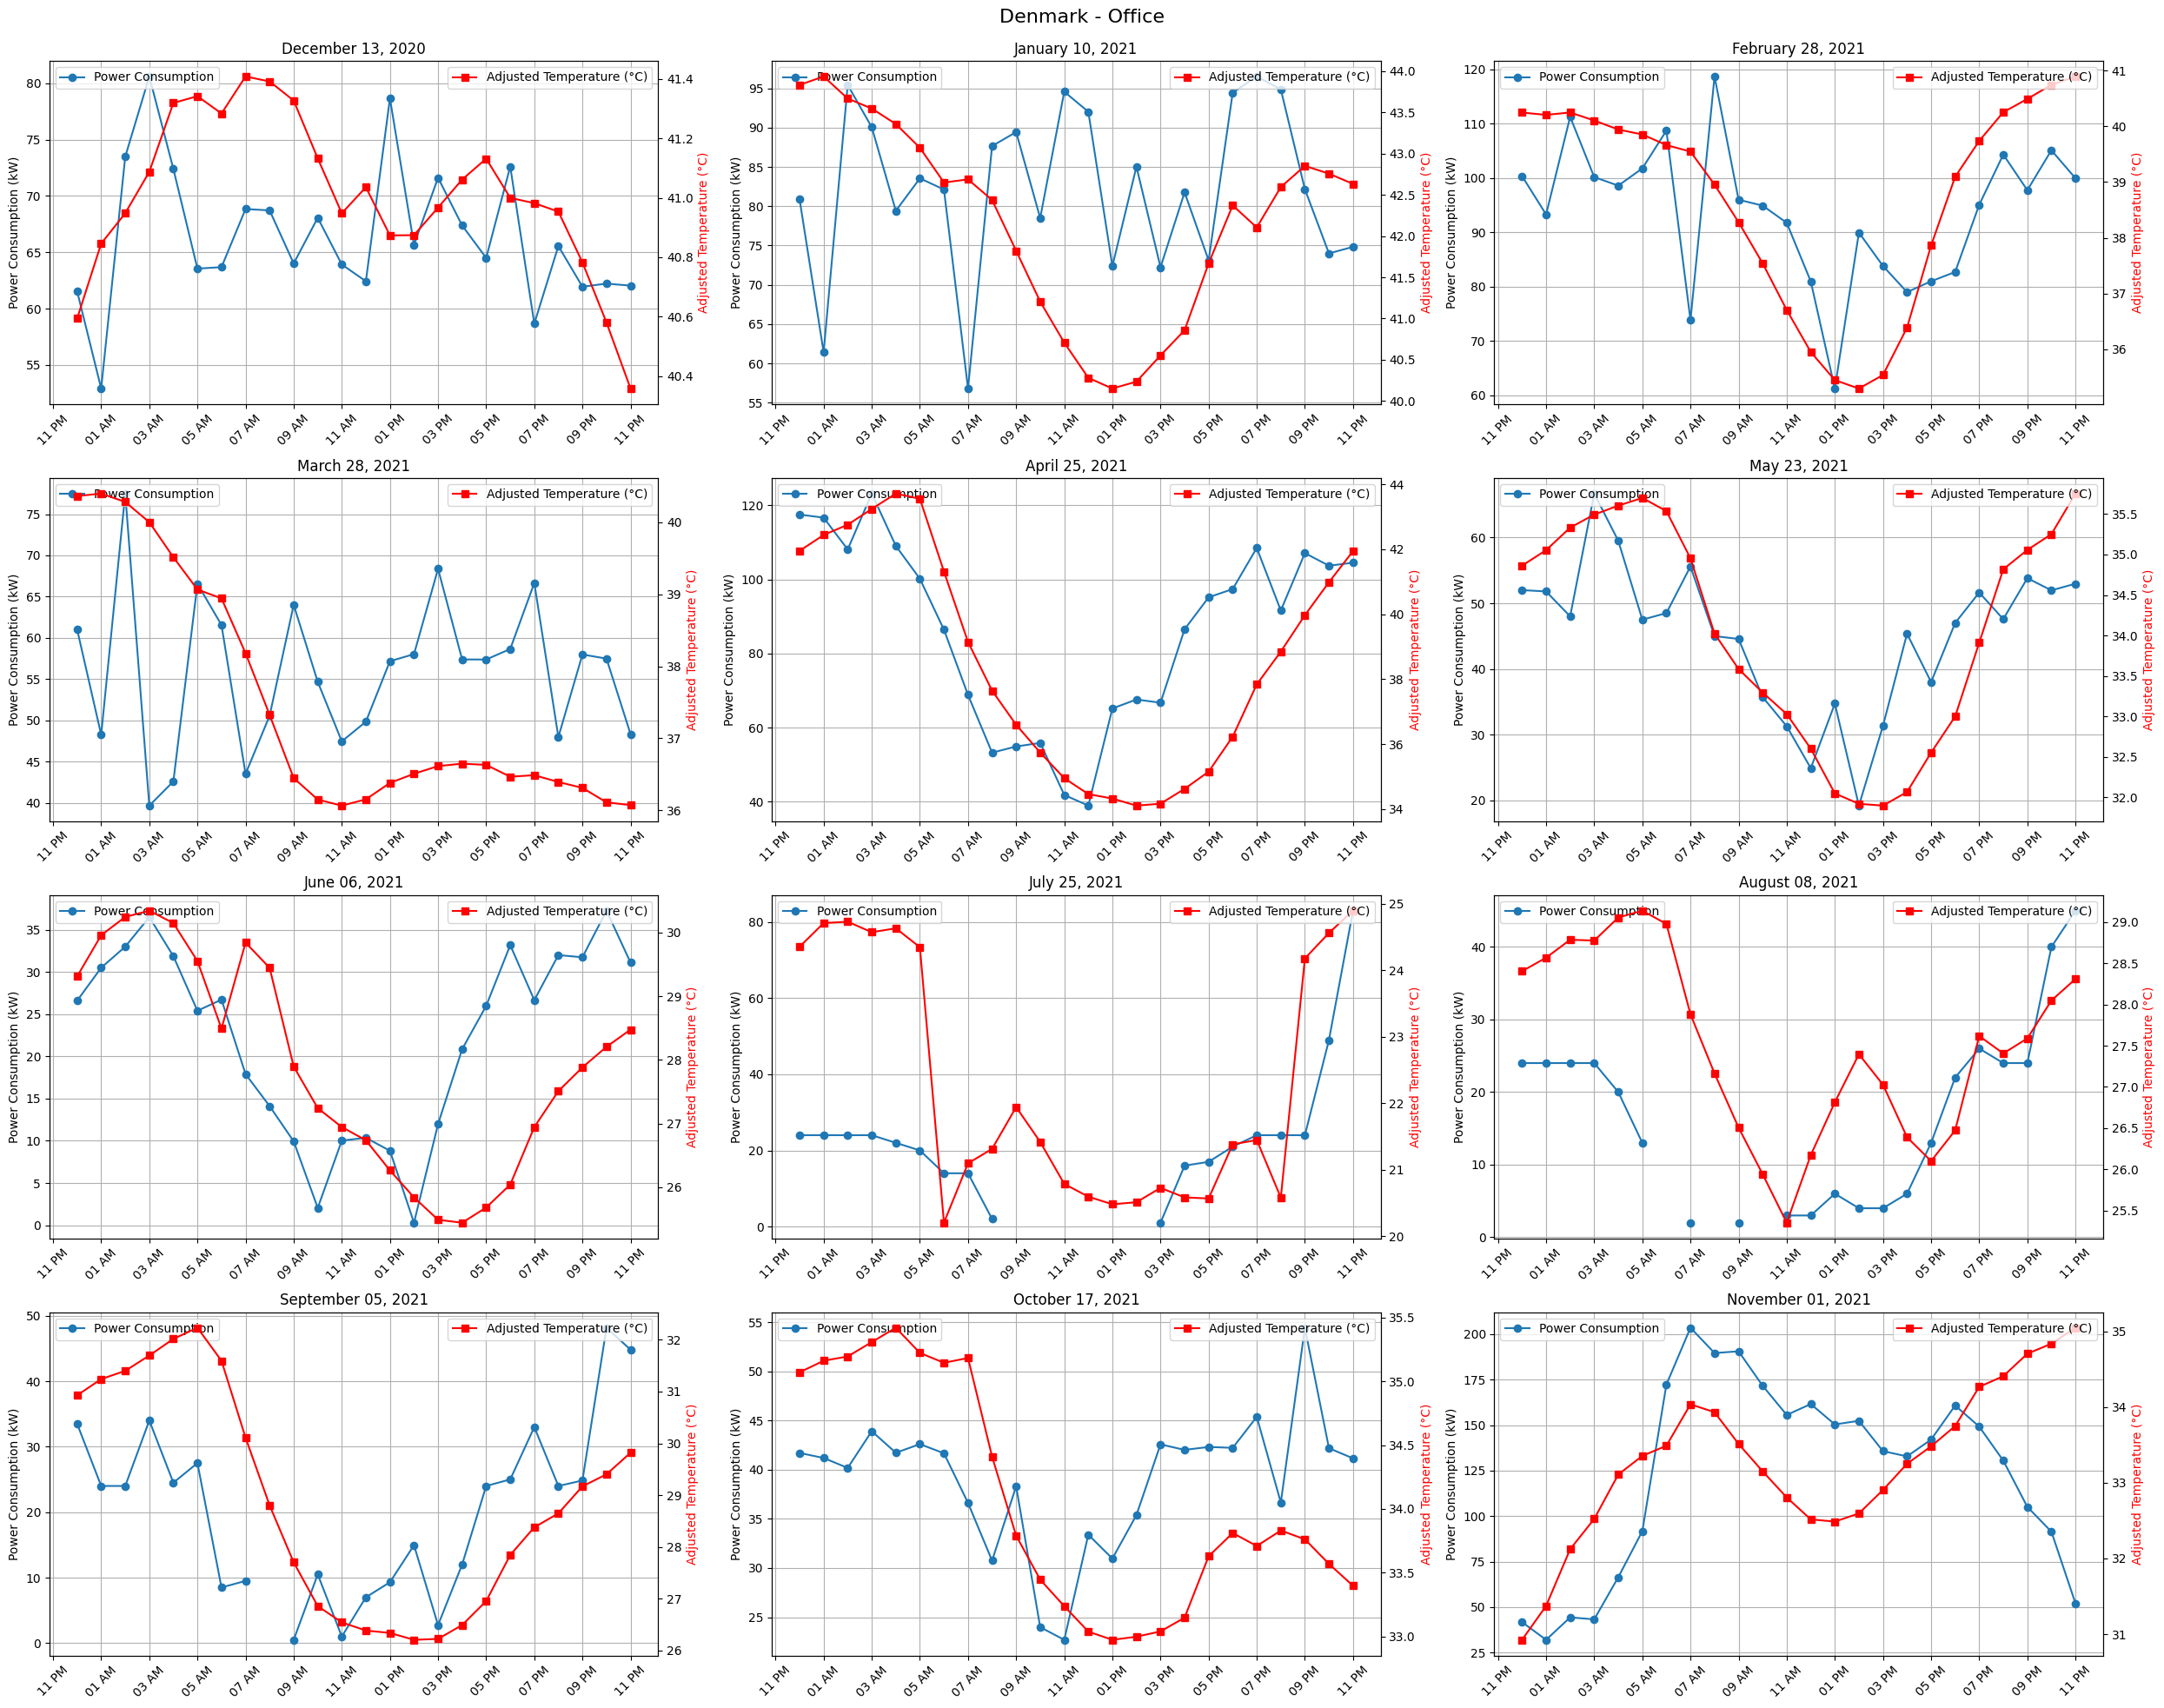

KeyError: 'adjusted_temp'

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import random

# Assuming df_1h and df_weather are your DataFrames and already loaded

# Convert the 'timestamp' column to datetime for all DataFrames
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Create a list of Sundays for each month
sundays_per_month = pd.date_range(start='2020-12-01', end='2021-11-01', freq='W-SUN')

# Create a list to store random Sundays
random_sundays = []

# Loop through each month and select a random Sunday if available
dates = pd.date_range(start='2020-12-01', end='2021-11-01', freq='MS')
for date in dates:
    month_sundays = sundays_per_month[sundays_per_month.to_series().dt.to_period('M') == date.to_period('M')]
    if not month_sundays.empty:
        random_sundays.append(random.choice(month_sundays.date))
    else:
        # If no Sundays are available, use the first day of the month (fallback)
        random_sundays.append(date)

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each date and create the plot
for i, date in enumerate(random_sundays):
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_weather = df_weather[df_weather['timestamp'].dt.date == pd.to_datetime(date).date()]

    # Invert temperatures outside the 20-22 range
    one_day_weather['adjusted_temp'] = np.where(
        (one_day_weather['air_temperature_at_2m(deg_C)'] < 20) | 
        (one_day_weather['air_temperature_at_2m(deg_C)'] > 22), 
        22 - (one_day_weather['air_temperature_at_2m(deg_C)'] - 22), 
        one_day_weather['air_temperature_at_2m(deg_C)']
    )

    # Plot hourly data
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', label='Power Consumption')
    
    axes[i].set_ylabel('Power Consumption (kW)')
    axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Plot adjusted temperature data
    ax2 = axes[i].twinx()
    ax2.plot(one_day_weather['timestamp'], one_day_weather['adjusted_temp'], marker='s', color='red', label='Adjusted Temperature (°C)')
    ax2.set_ylabel('Adjusted Temperature (°C)', color='red')
    ax2.legend(loc='upper right')

    # Limit x-ticks to avoid max ticks error
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set interval to 2 hours
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for the last subplot
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
fig.suptitle('Denmark - Office', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

# Plot Power Consumption vs Adjusted Temperature
plt.figure(figsize=(12, 6))
plt.scatter(df_1h['main_meter(kW)'], df_weather['adjusted_temp'], alpha=0.5)
plt.title('Power Consumption vs Adjusted Temperature')
plt.xlabel('Power Consumption (kW)')
plt.ylabel('Adjusted Temperature (°C)')
plt.grid(True)
plt.show()


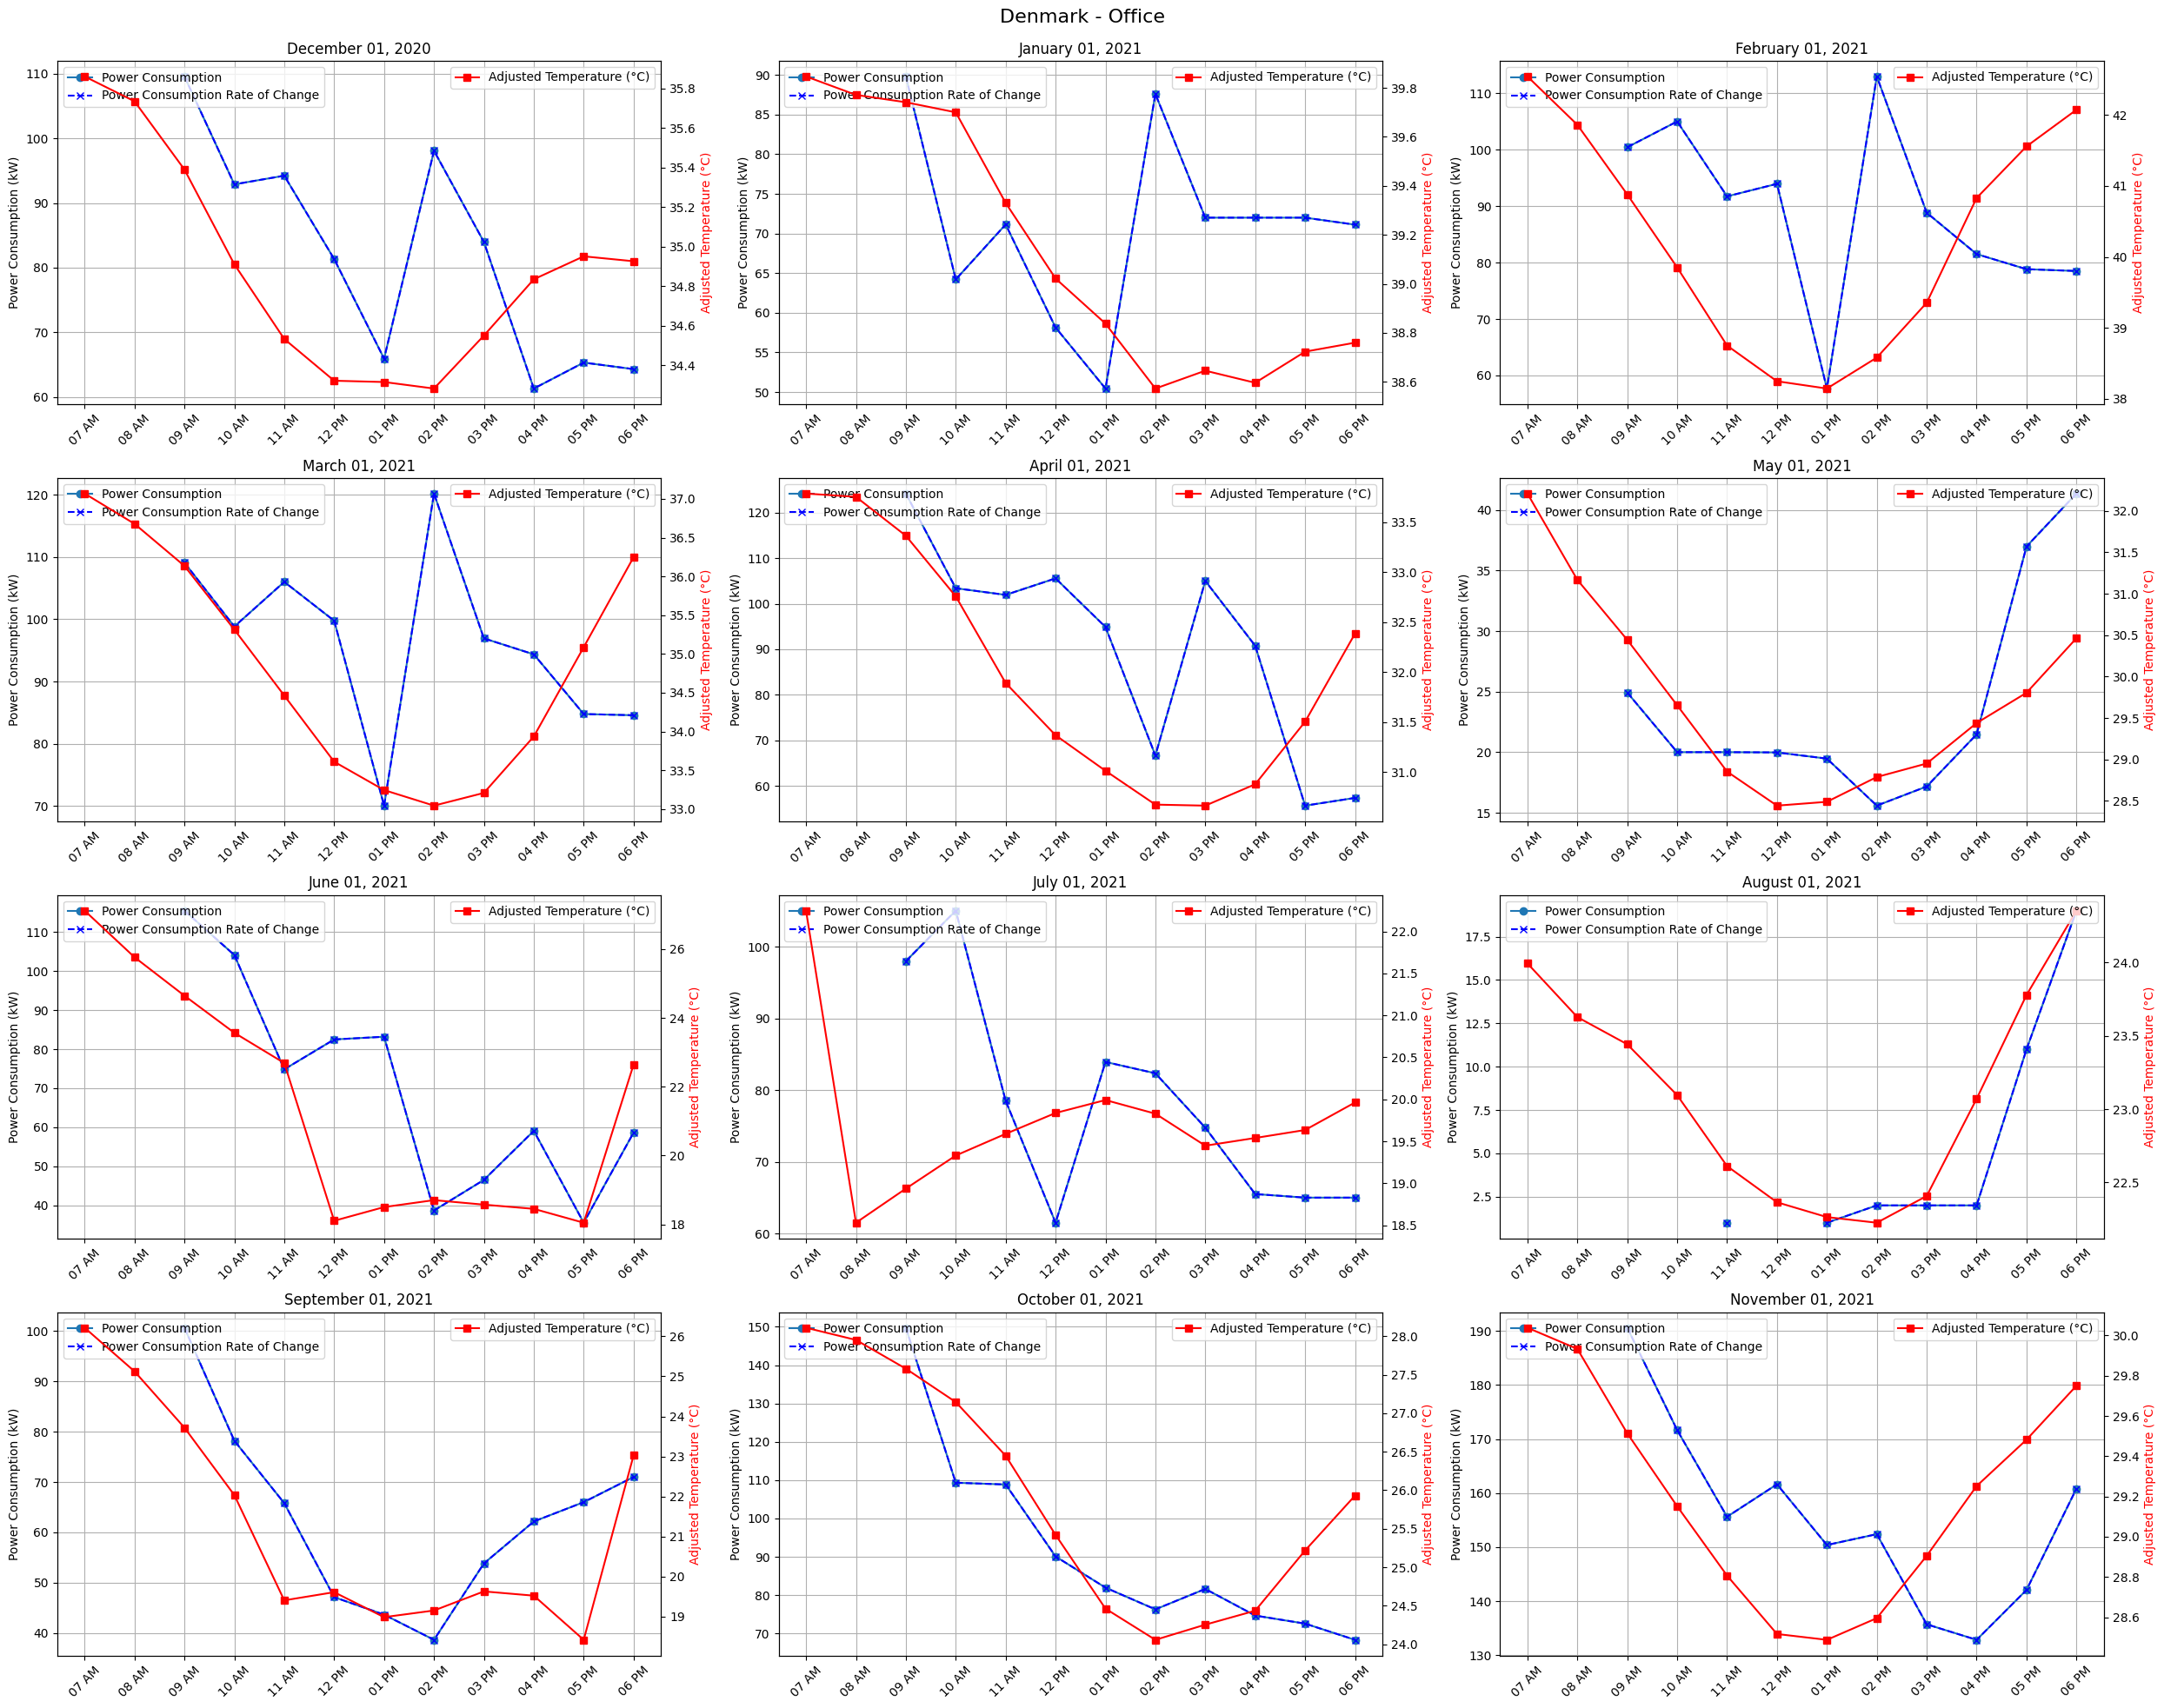

KeyError: 'adjusted_temp'

<Figure size 1200x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Assuming df_1h and df_weather are your DataFrames and already loaded

# Convert the 'timestamp' column to datetime for all DataFrames
df_1h['timestamp'] = pd.to_datetime(df_1h['timestamp'])
df_weather['timestamp'] = pd.to_datetime(df_weather['timestamp'])

# Filter data to include only between 9 AM and 6 PM
df_1h = df_1h[df_1h['timestamp'].dt.hour.between(9, 18)]
df_weather = df_weather[df_weather['timestamp'].dt.hour.between(7, 18)]

# Create a list of dates for the first day of each month in 2021
dates = pd.date_range(start='2020-12-01', end='2021-11-01', freq='MS').date

# Create a 3x4 grid of subplots
fig, axes = plt.subplots(4, 3, figsize=(25, 20), sharex=False, sharey=False)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each date and create the plot
for i, date in enumerate(dates):
    one_day_hourly = df_1h[df_1h['timestamp'].dt.date == pd.to_datetime(date).date()]
    one_day_weather = df_weather[df_weather['timestamp'].dt.date == pd.to_datetime(date).date()]

    # Invert temperatures outside the 18-20 range
    one_day_weather['adjusted_temp'] = np.where(
        (one_day_weather['air_temperature_at_2m(deg_C)'] < 18) | 
        (one_day_weather['air_temperature_at_2m(deg_C)'] > 20), 
        20 - (one_day_weather['air_temperature_at_2m(deg_C)'] - 20), 
        one_day_weather['air_temperature_at_2m(deg_C)']
    )

    # Calculate the differentiated power consumption
    one_day_hourly['power_diff'] = one_day_hourly['main_meter(kW)']
    
    # Plot hourly data
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['main_meter(kW)'], marker='o', label='Power Consumption')
    axes[i].plot(one_day_hourly['timestamp'], one_day_hourly['power_diff'], marker='x', linestyle='--', color='blue', label='Power Consumption Rate of Change')
    
    axes[i].set_ylabel('Power Consumption (kW)')
    axes[i].set_title(f'{date.strftime("%B %d, %Y")}')
    axes[i].grid(True)
    axes[i].legend(loc='upper left')

    # Plot adjusted temperature data
    ax2 = axes[i].twinx()
    ax2.plot(one_day_weather['timestamp'], one_day_weather['adjusted_temp'], marker='s', color='red', label='Adjusted Temperature (°C)')
    ax2.set_ylabel('Adjusted Temperature (°C)', color='red')
    ax2.legend(loc='upper right')

    # Limit x-ticks to avoid max ticks error
    ax2.xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Set interval to 1 hour
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%I %p'))

# Rotate x-axis labels for the last subplot
for ax in axes:
    ax.tick_params(axis='x', rotation=45)

fig.tight_layout()
fig.suptitle('Denmark - Office', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.show()

# Plot Power Consumption vs Adjusted Temperature
plt.figure(figsize=(12, 6))
plt.scatter(df_1h['main_meter(kW)'], df_weather['adjusted_temp'], alpha=0.5)
plt.title('Power Consumption vs Adjusted Temperature')
plt.xlabel('Power Consumption (kW)')
plt.ylabel('Adjusted Temperature (°C)')
plt.grid(True)
plt.show()

# Plot Power Consumption Rate of Change vs Adjusted Temperature
plt.figure(figsize=(12, 6))
plt.scatter(df_1h['power_diff'].dropna(), df_weather['adjusted_temp'].dropna(), alpha=0.5)
plt.title('Rate of Change of Power Consumption vs Adjusted Temperature')
plt.xlabel('Rate of Change of Power Consumption (kW/hour)')
plt.ylabel('Adjusted Temperature (°C)')
plt.grid(True)
plt.show()
